In [1]:
import pandas as pd
import numpy as np
import helper
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.style as style
style.use('fivethirtyeight')

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
colors = ["#FF0B04", "#F1BE48",
           "#B9975B", "#8B5B29",
           "#524727",
         ]
sns.set_palette(sns.color_palette(colors))

In [3]:
# importing data
housing_raw = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0,low_memory = False)
# data processing
train, test = helper.data_processing_wrapper(housing_raw,
                                               num_to_cat_list = ['MSSubClass','MoSold'],
                                             remove_PID = False
                                        )

# feature engineering wrapper
train, test = helper.feature_engineering_wrapper(train, test)

# importing school feature
schools = pd.read_csv('schoolFeatures.csv',index_col = 0)
school_keep = [
    'PID',
    'closestSchool'
]
schools = schools[school_keep]

# merge school feature onto original data set.
train = train.merge(schools, how = 'left', left_on = 'PID', right_on = 'PID')
test = test.merge(schools, how = 'left', left_on = 'PID', right_on = 'PID')

train = train.dropna(subset=['closestSchool'])
train = train.reset_index(drop=True)

test = test.dropna(subset=['closestSchool'])
test = test.reset_index(drop=True)

housing = pd.concat([train,test],axis=0)

In [4]:
# importing latlong data
latlong = pd.read_csv('ames_housing_latlong.csv', index_col=0)
latlong_keep = [
    'PID',
    'latitude',
    'longitude'
]
latlong = latlong[latlong_keep]

# merge school feature onto original data set.
housing = housing.merge(latlong, how = 'left', left_on = 'PID', right_on = 'PID')

housing = housing[(housing['latitude']>=41.9)&(housing['longitude']<=-93.59)]

In [5]:
housing.head()

PID  GrLivArea  SalePrice MSSubClass MSZoning  LotFrontage  LotArea  \
0  905101330       1296      90000         90       RL    72.000000    10791   
1  909451100       1229     137000        160       RM    24.000000     1488   
2  527451450        948      89000        160       RM    21.000000     1680   
3  903232190       1040     123900         50       RM    52.000000     6240   
4  914452120        912     156000         85       RL    61.990202     7540   

  Street  Alley LotShape  ... year_since_remod_square_root  \
0   Pave      0      Reg  ...                     6.244998   
1   Pave      0      Reg  ...                     4.123106   
2   Pave      0      Reg  ...                     5.830952   
3   Pave      0      Reg  ...                     5.477226   
4   Pave      0      IR1  ...                     5.385165   

  BsmtExposure_squared BsmtExposure_cubed BsmtExposure_square_root  \
0                    0                  0                 0.000000   
1                    4                  8                 1.414214   
2                    1                  1                 1.000000   
3                    1                  1                 1.000000   
4                    9                 27                 1.732051   

  KitchenQual_squared KitchenQual_cubed KitchenQual_square_root  \
0                   9                27                1.732051   
1                  16                64                2.000000   
2                   9                27                1.732051   
3                   9                27                1.732051   
4                   9                27                1.732051   

                closestSchool   latitude  longitude  
0                Abbie Sawyer  42.033394 -93.671438  
1          Ames Middle School  42.009938 -93.648234  
2  Northwood Preschool Center  42.051657 -93.629641  
3                      Meeker  42.031644 -93.623450  
4               Kate Mitchell  41.994200 -93.606414  

[5 rows x 131 columns]

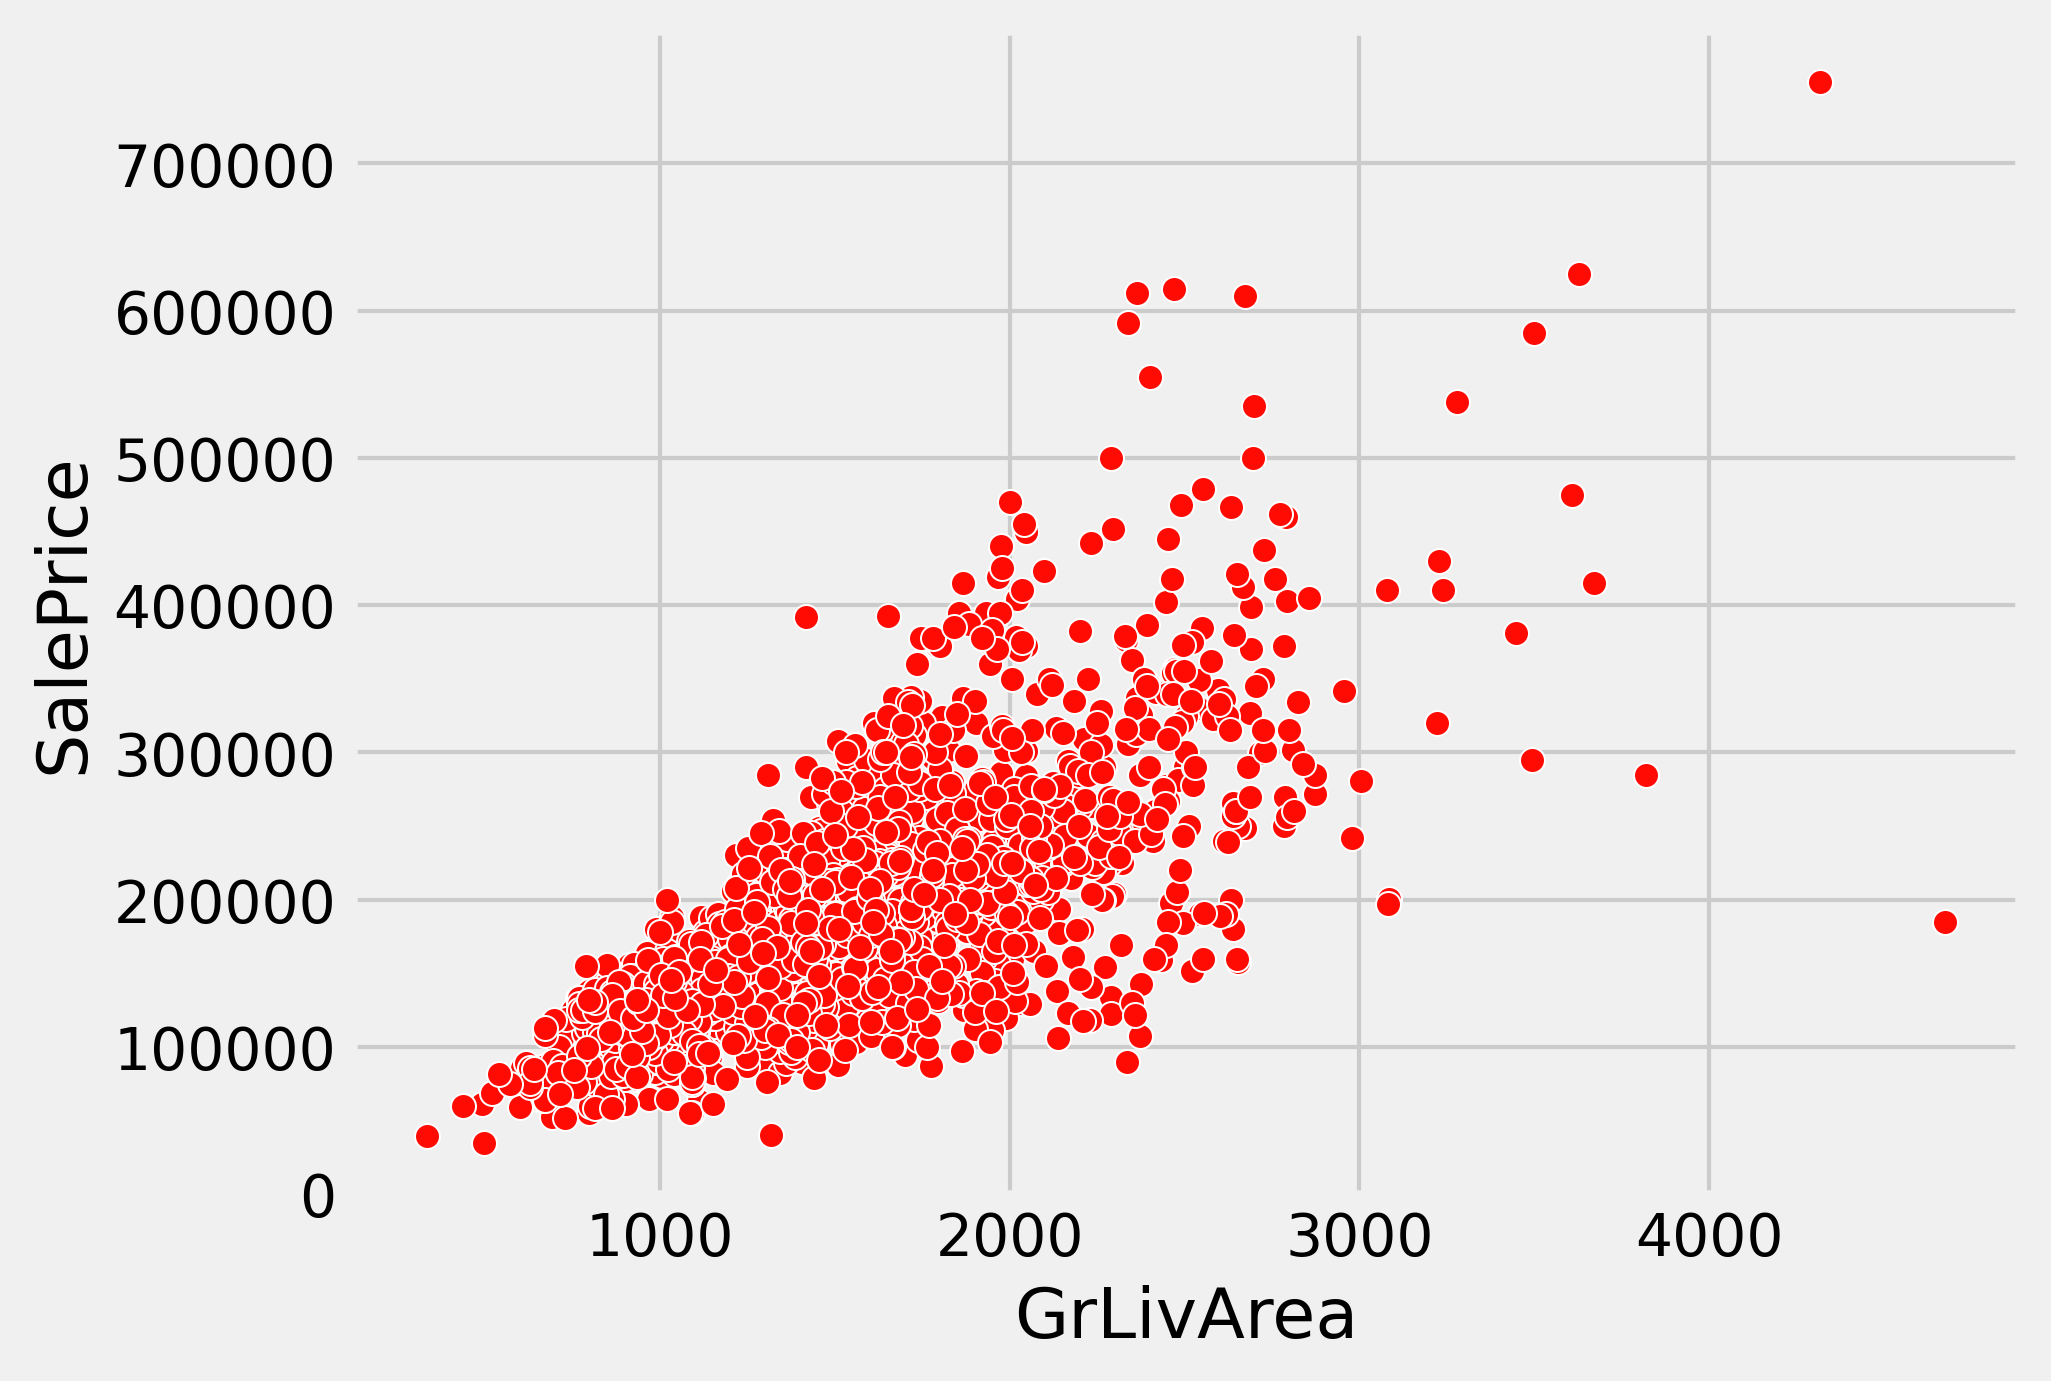

In [6]:
sns.scatterplot(data = housing, x = 'GrLivArea', y = 'SalePrice')
plt.show()

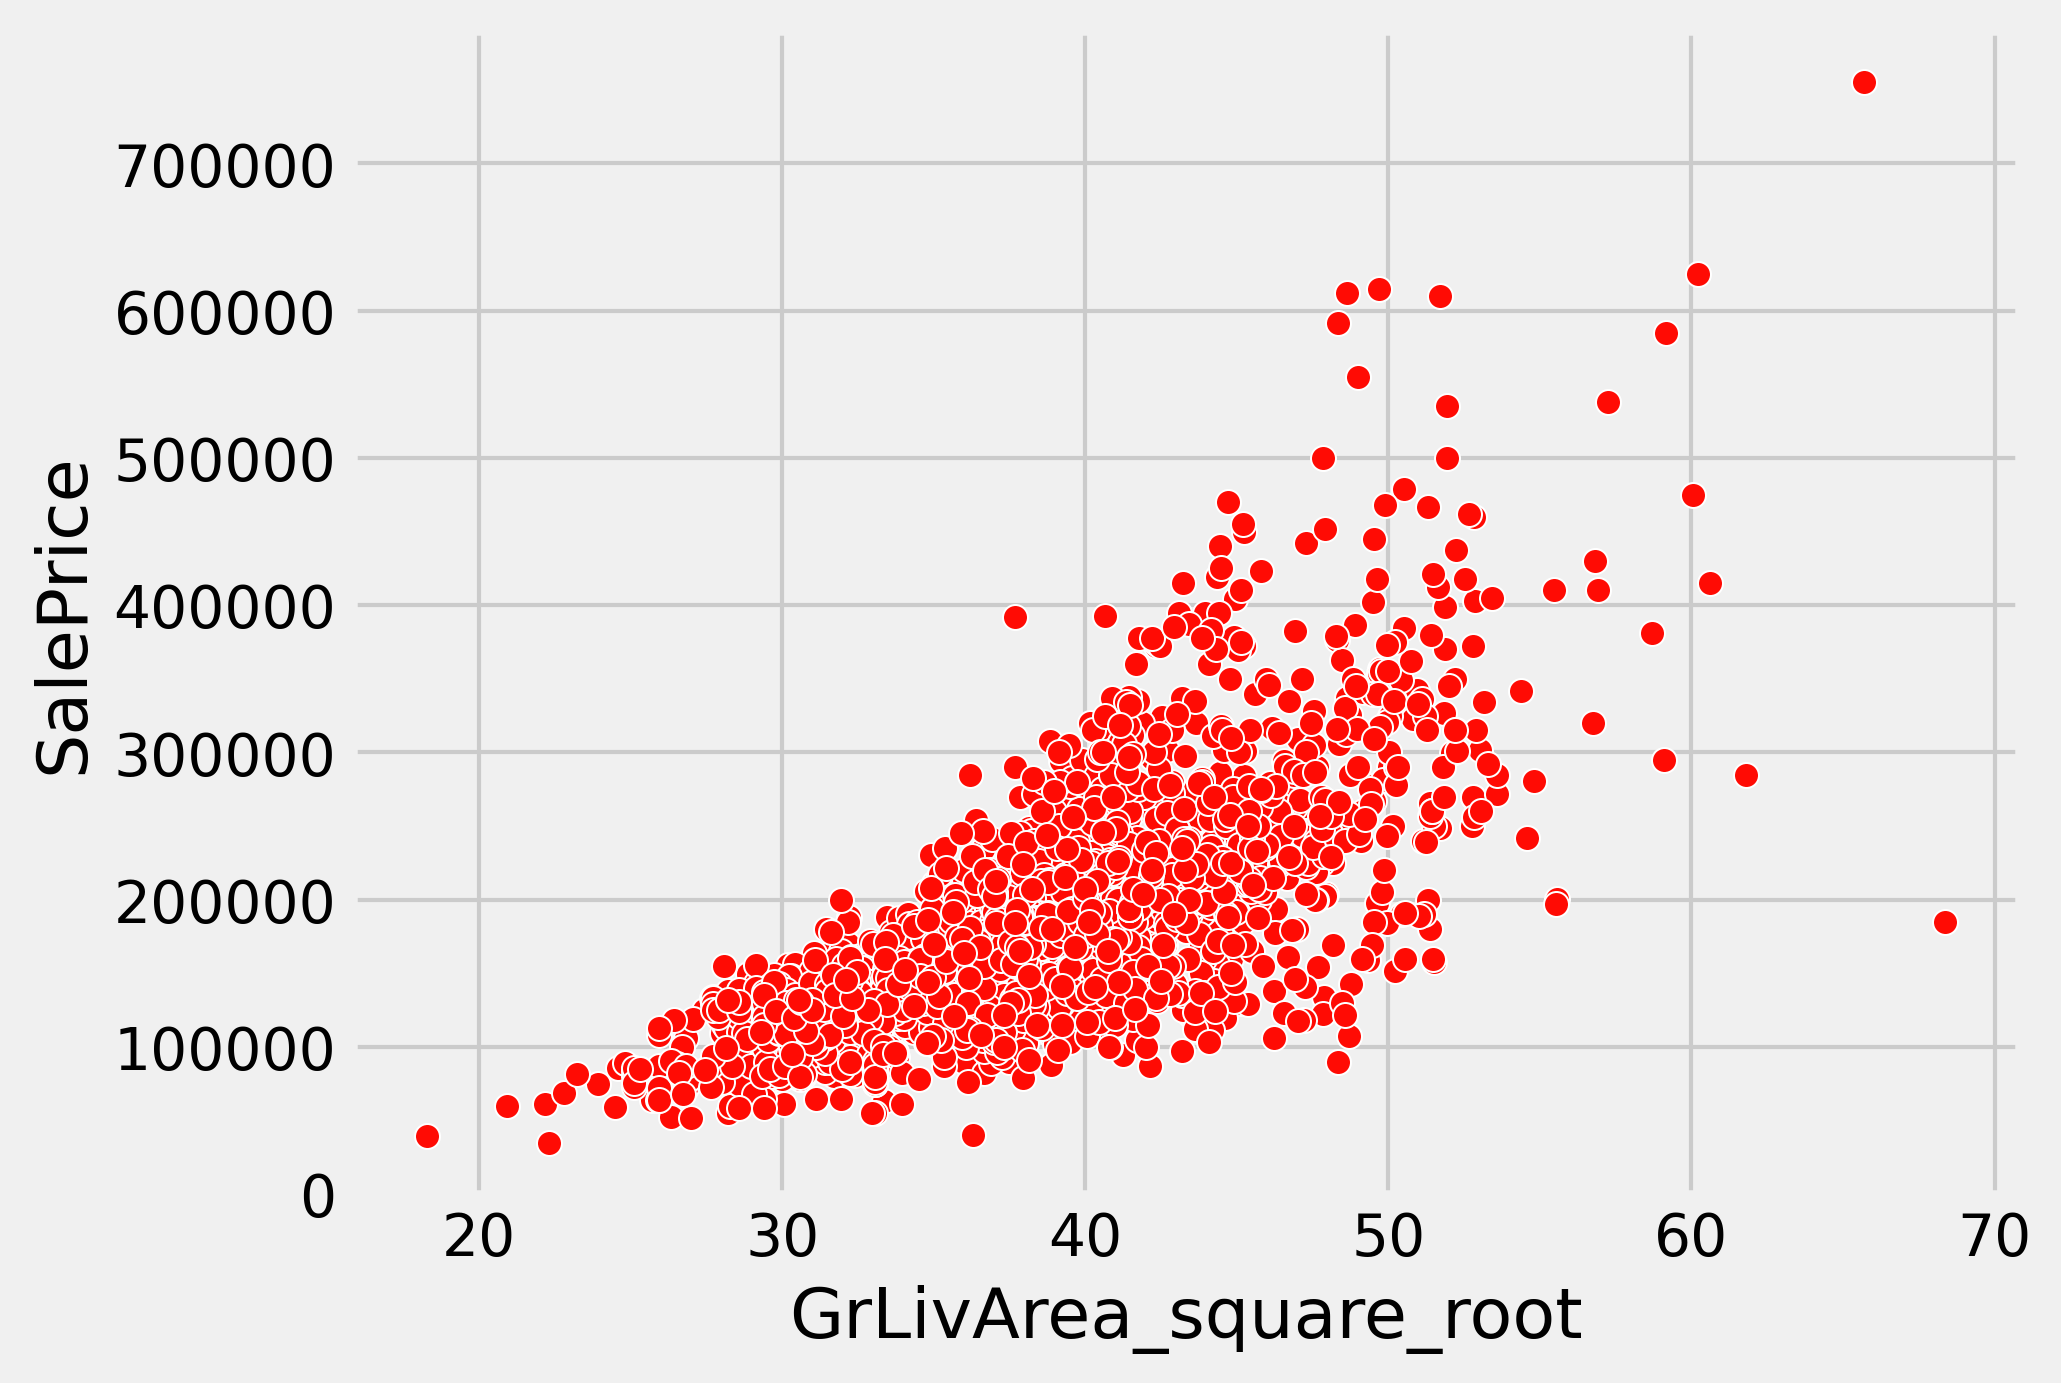

In [7]:
sns.scatterplot(data = housing, x = 'GrLivArea_square_root', y = 'SalePrice')
plt.show()

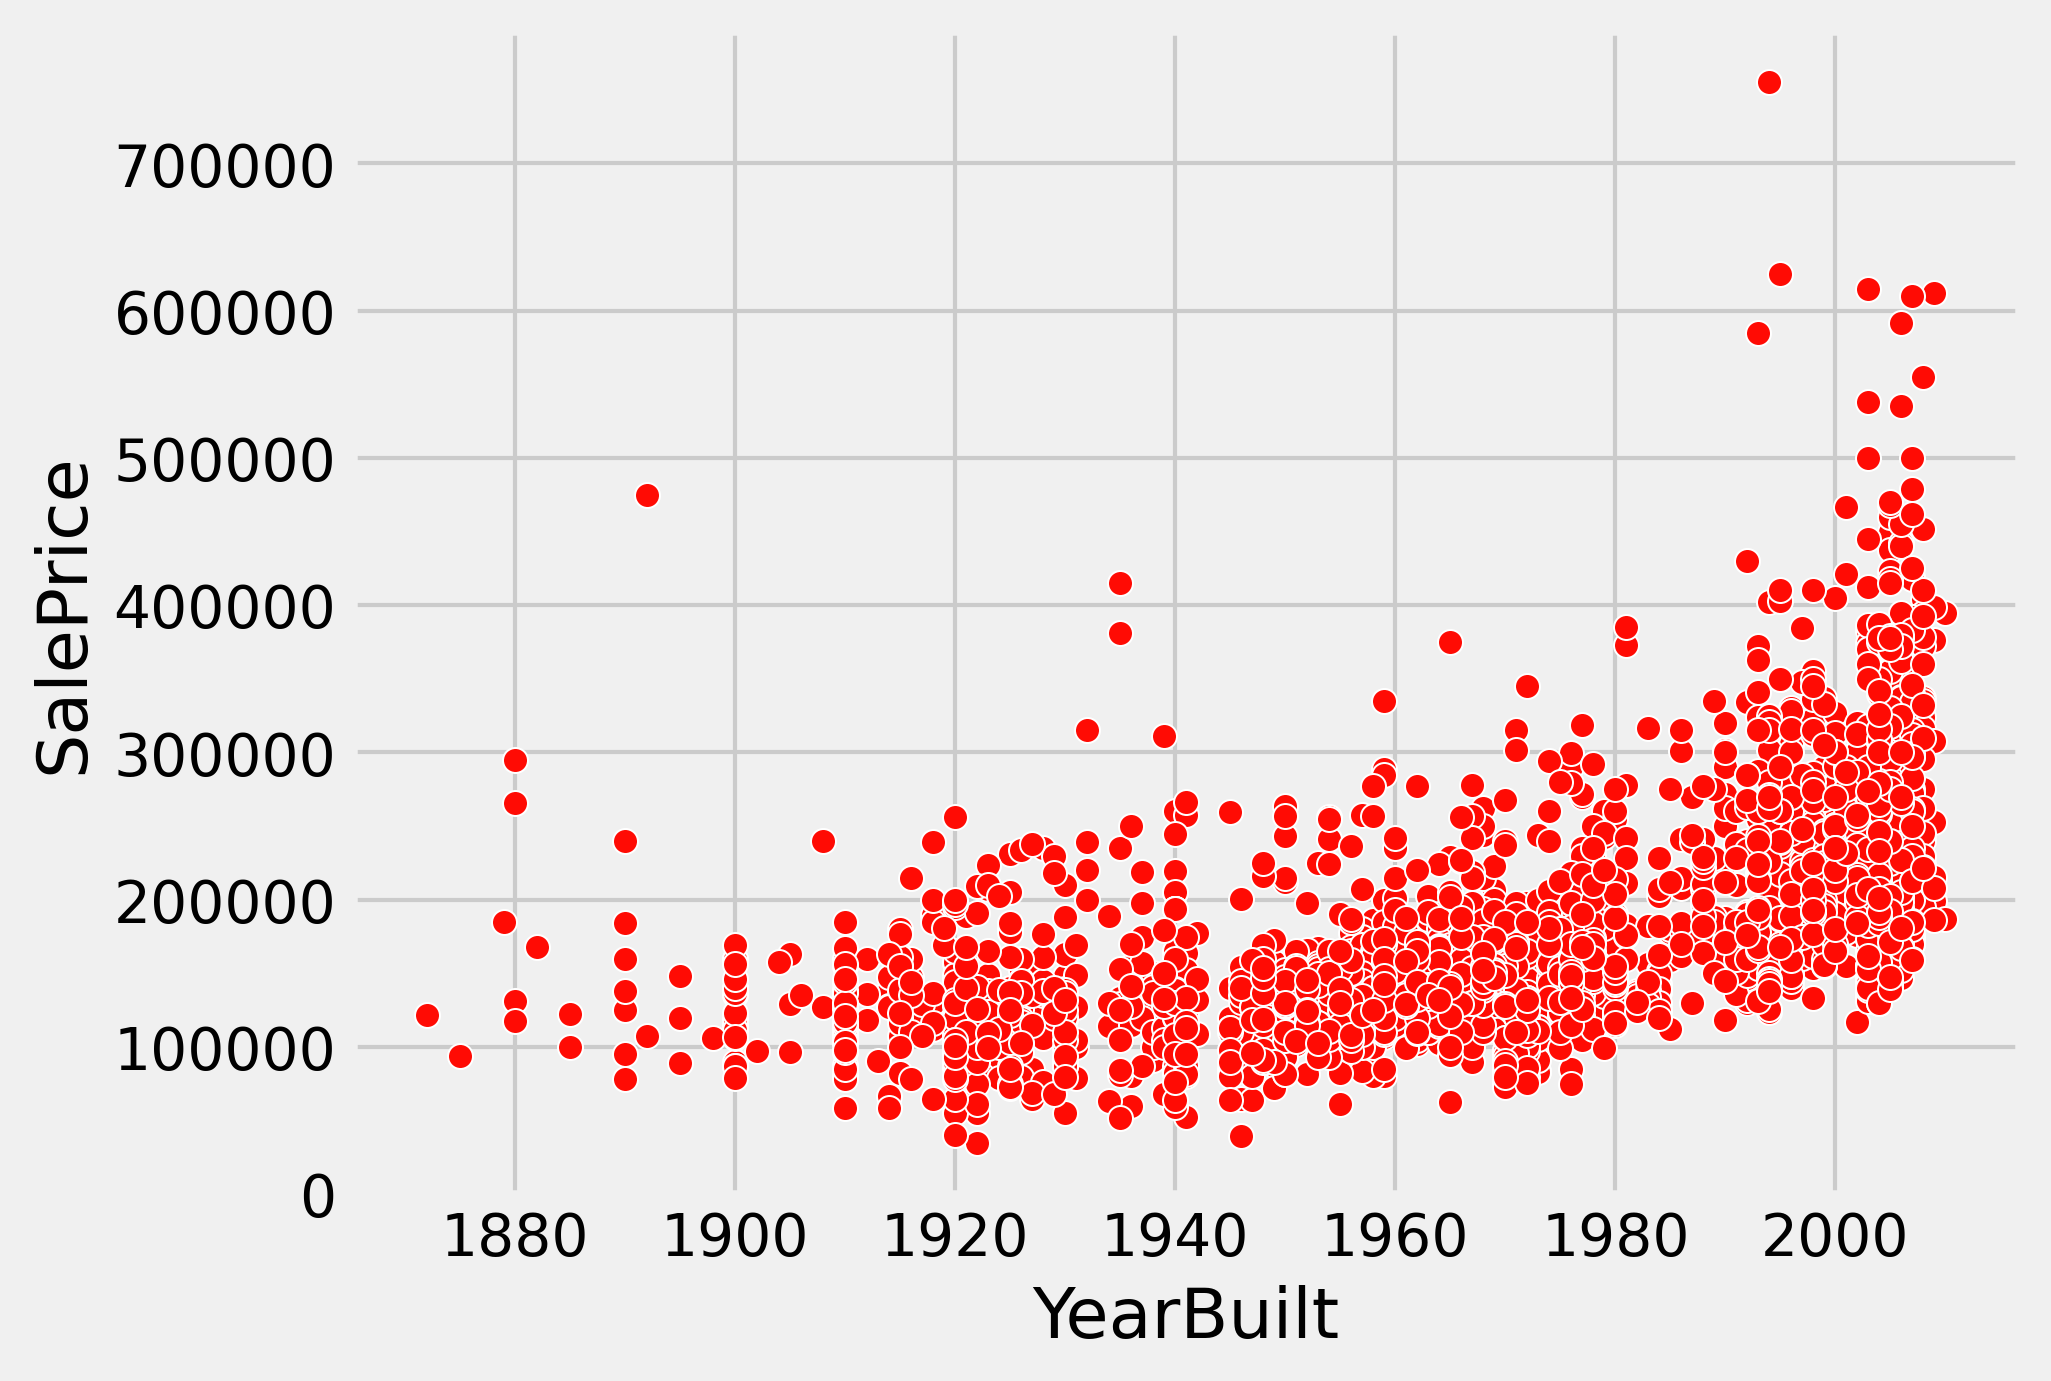

In [8]:
sns.scatterplot(data = housing, x = 'YearBuilt', y = 'SalePrice')
plt.show()

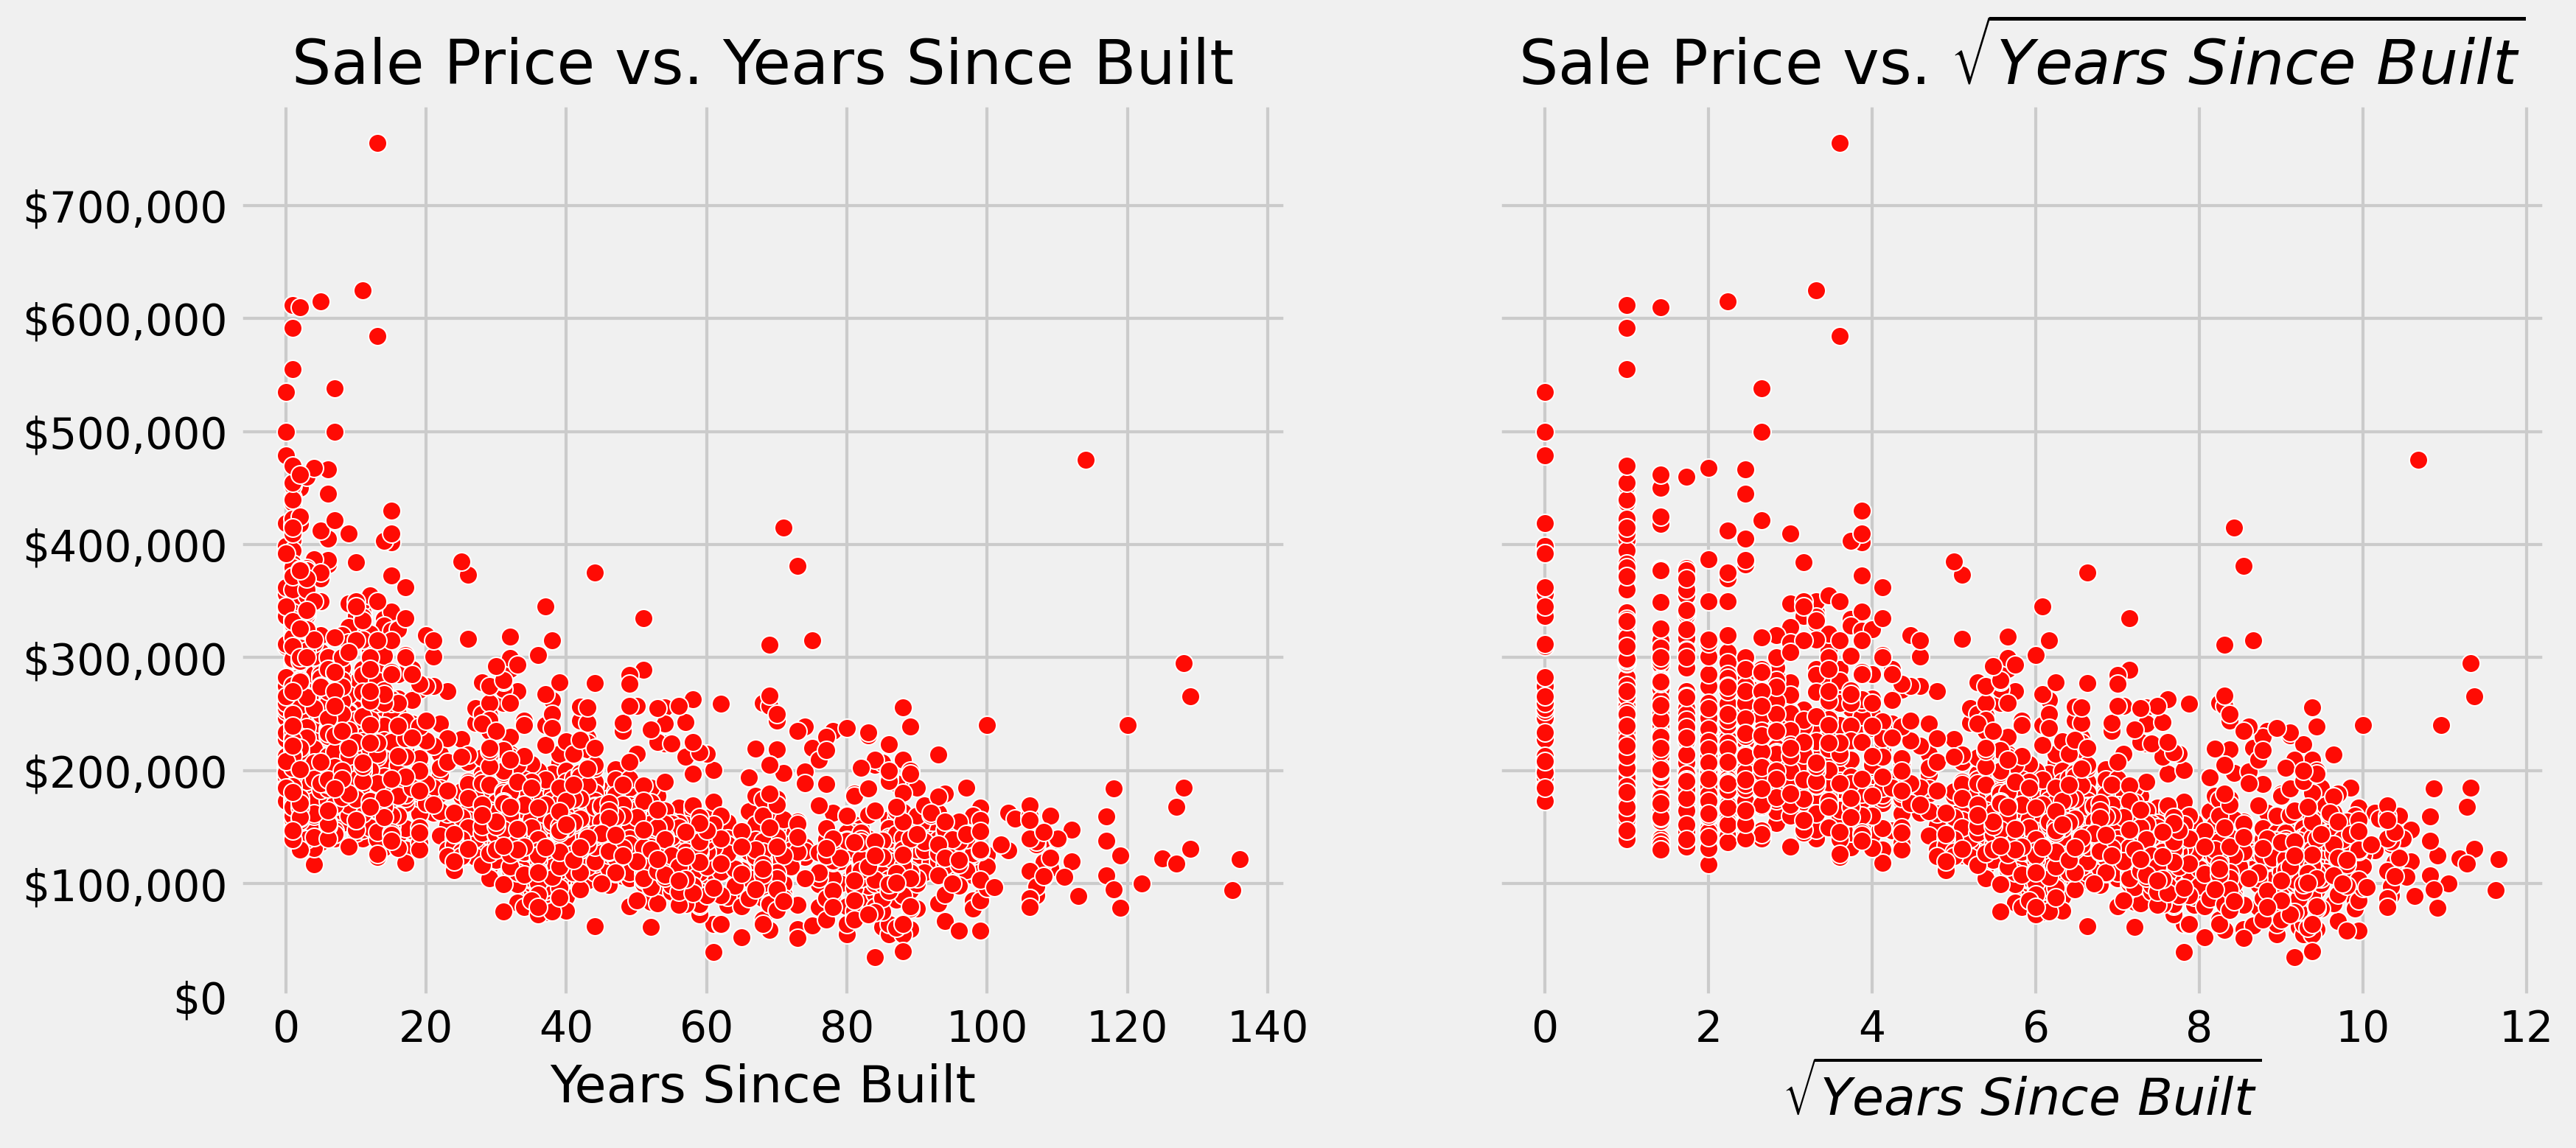

In [52]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5), 
                              sharey= True, 
#                               constrained_layout = True
                             )
g = sns.scatterplot(data = housing, x = 'year_since_built', y = 'SalePrice', ax = ax1)
g.set(xlabel='Years Since Built', ylabel='',title=f'Sale Price vs. Years Since Built')
ax1.yaxis.set_major_formatter('${x:,.0f}')

g = sns.scatterplot(data = housing, x = 'year_since_built_square_root', y = 'SalePrice', ax = ax2,
#                    color = colors[1]
                   )
g.set(xlabel='$\sqrt{Years\ Since\ Built}$', ylabel='',title=r'Sale Price vs. $\sqrt{Years\ Since\ Built}$')

plt.show()

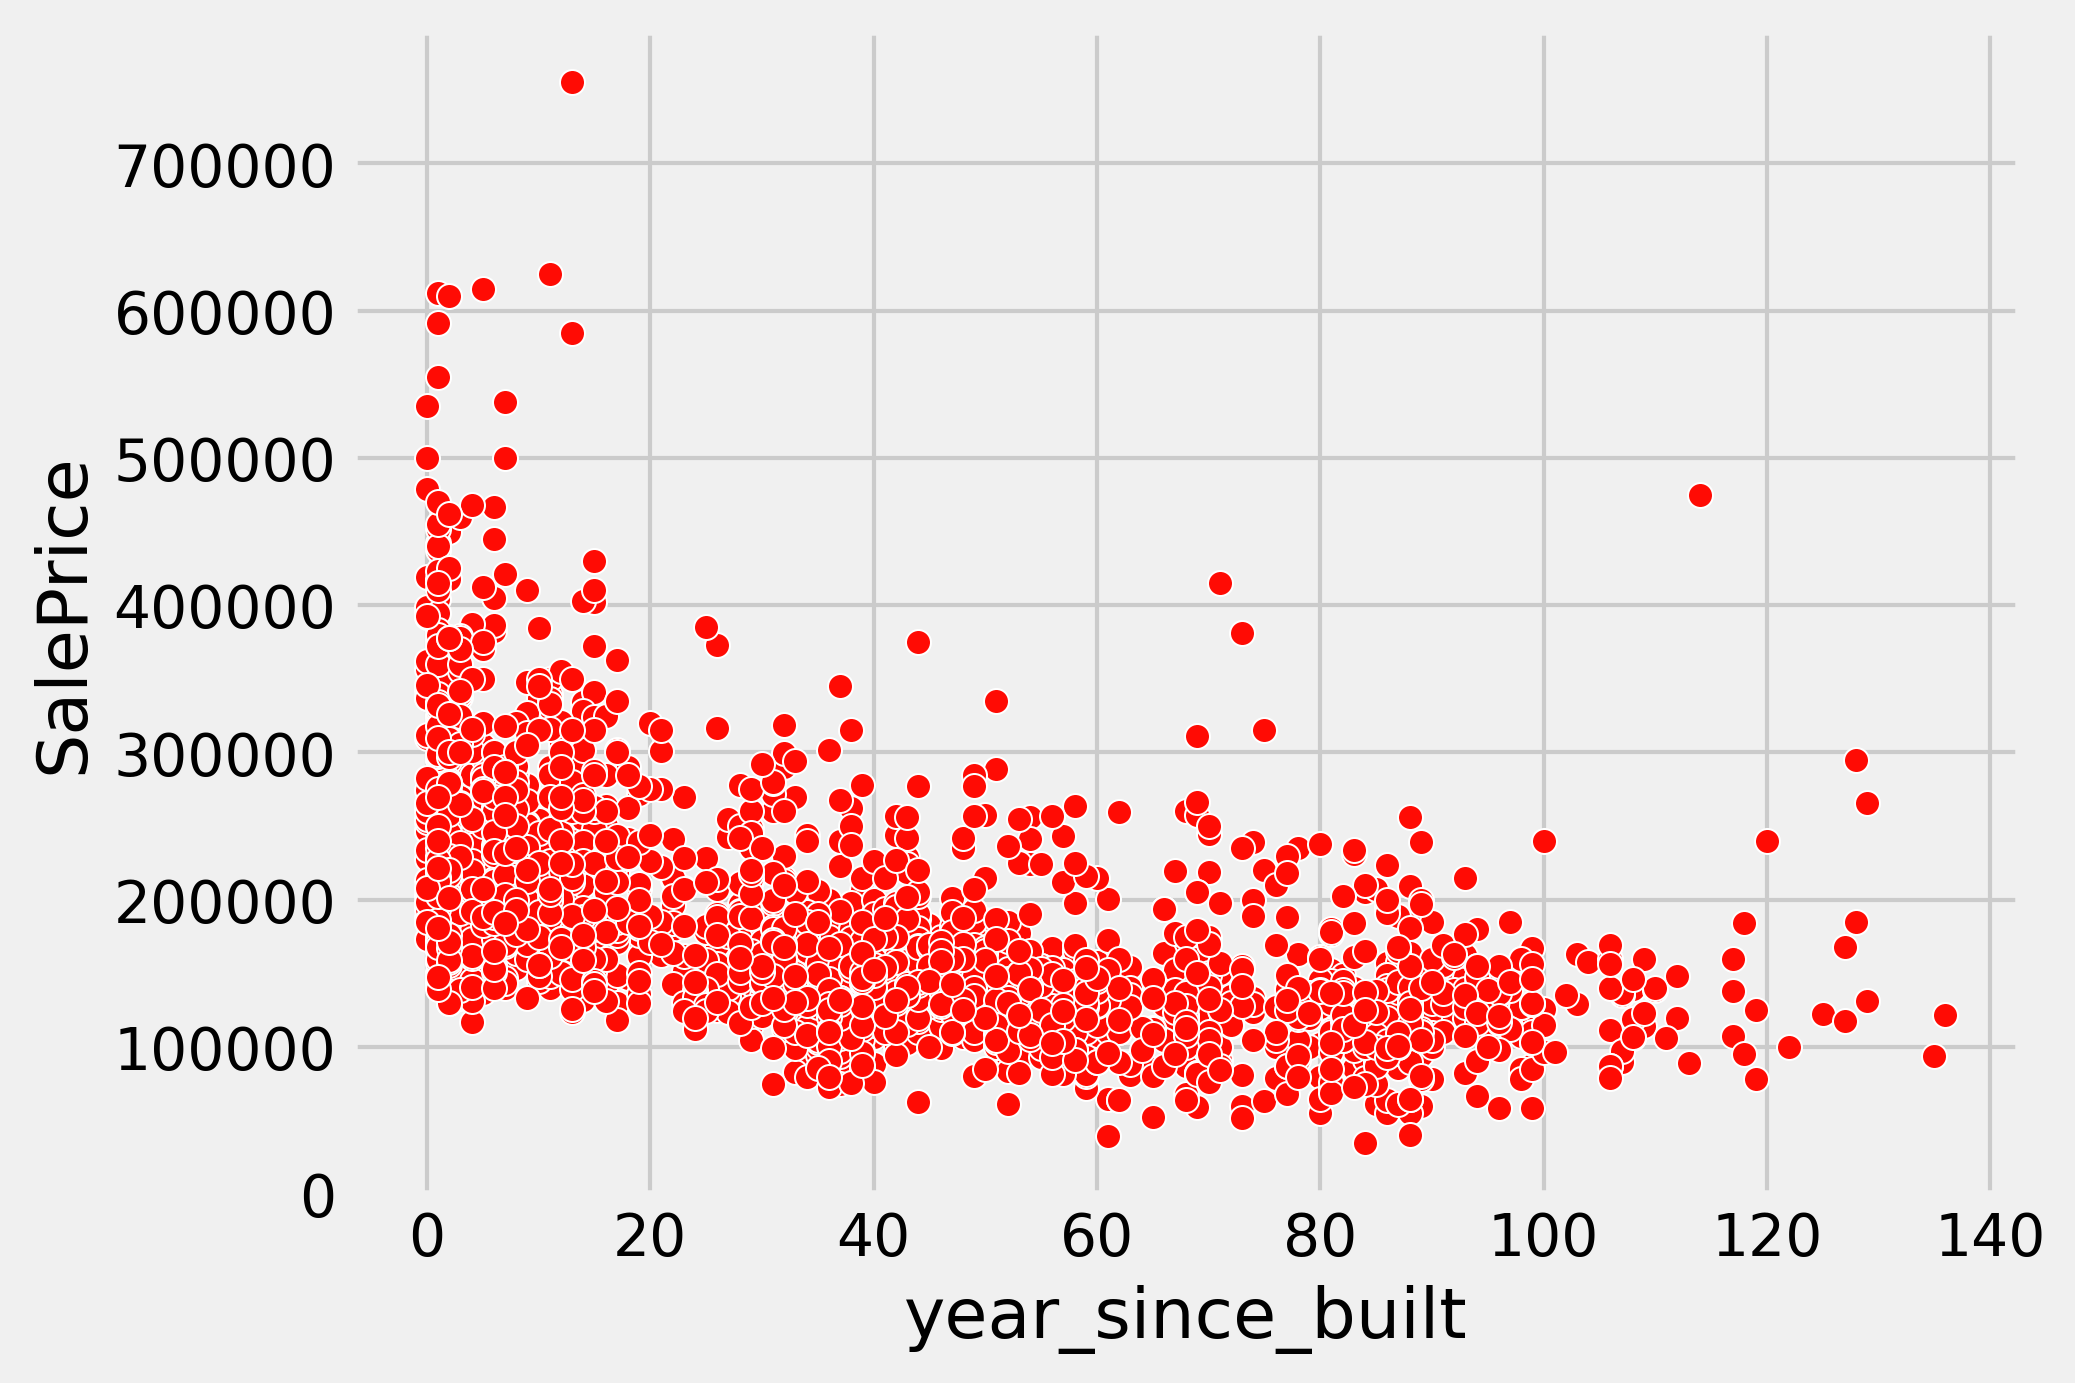

In [10]:
sns.scatterplot(data = housing, x = 'year_since_built', y = 'SalePrice')
plt.show()

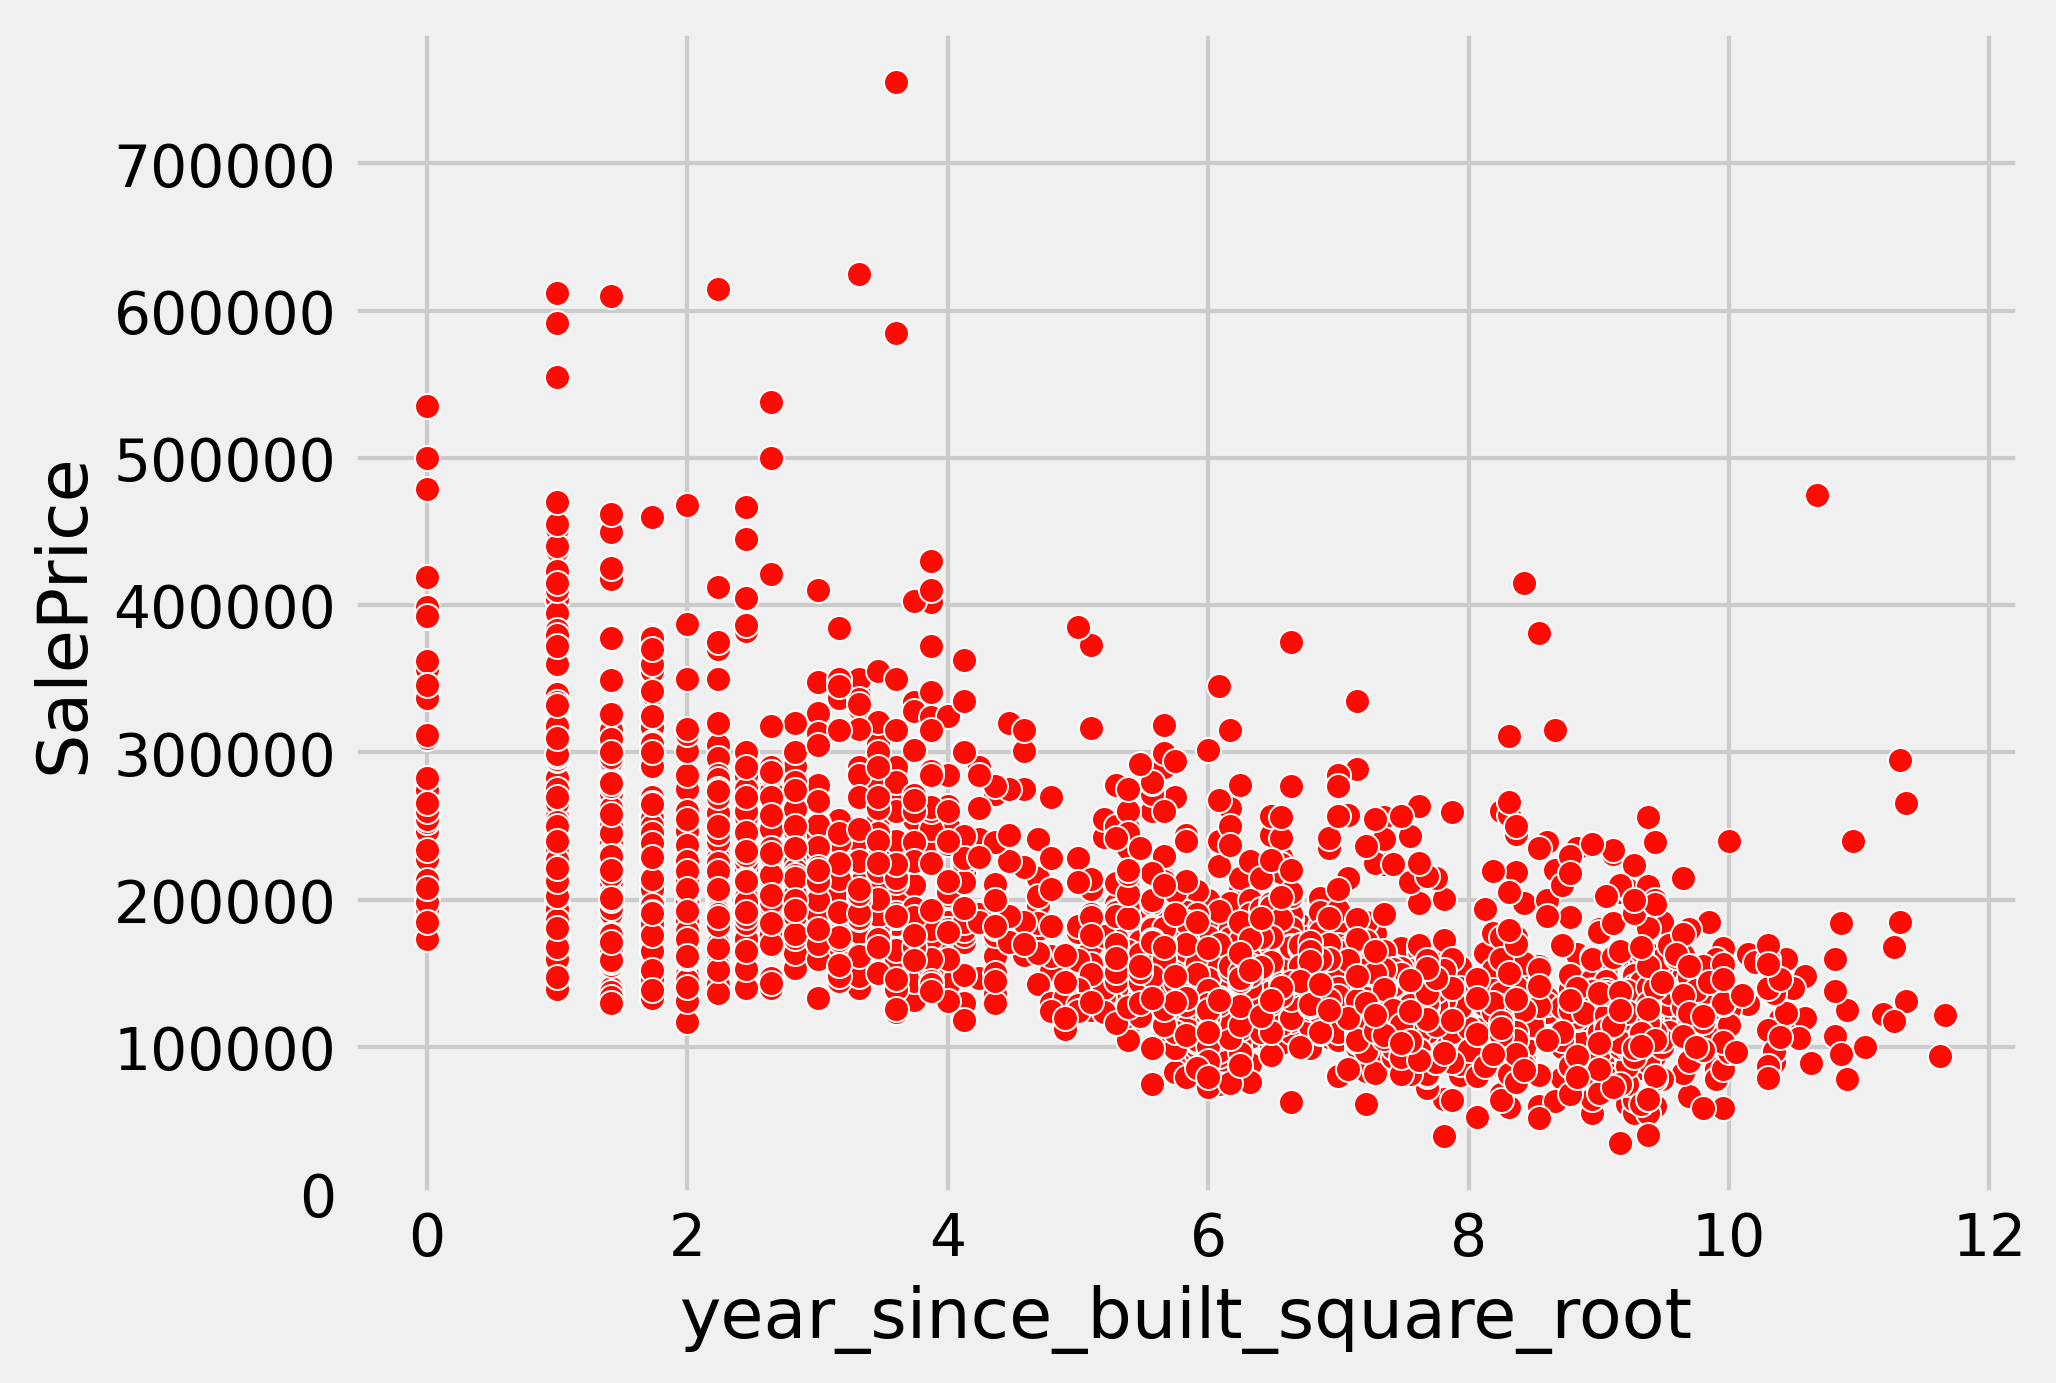

In [11]:
sns.scatterplot(data = housing, x = 'year_since_built_square_root', y = 'SalePrice')
plt.show()

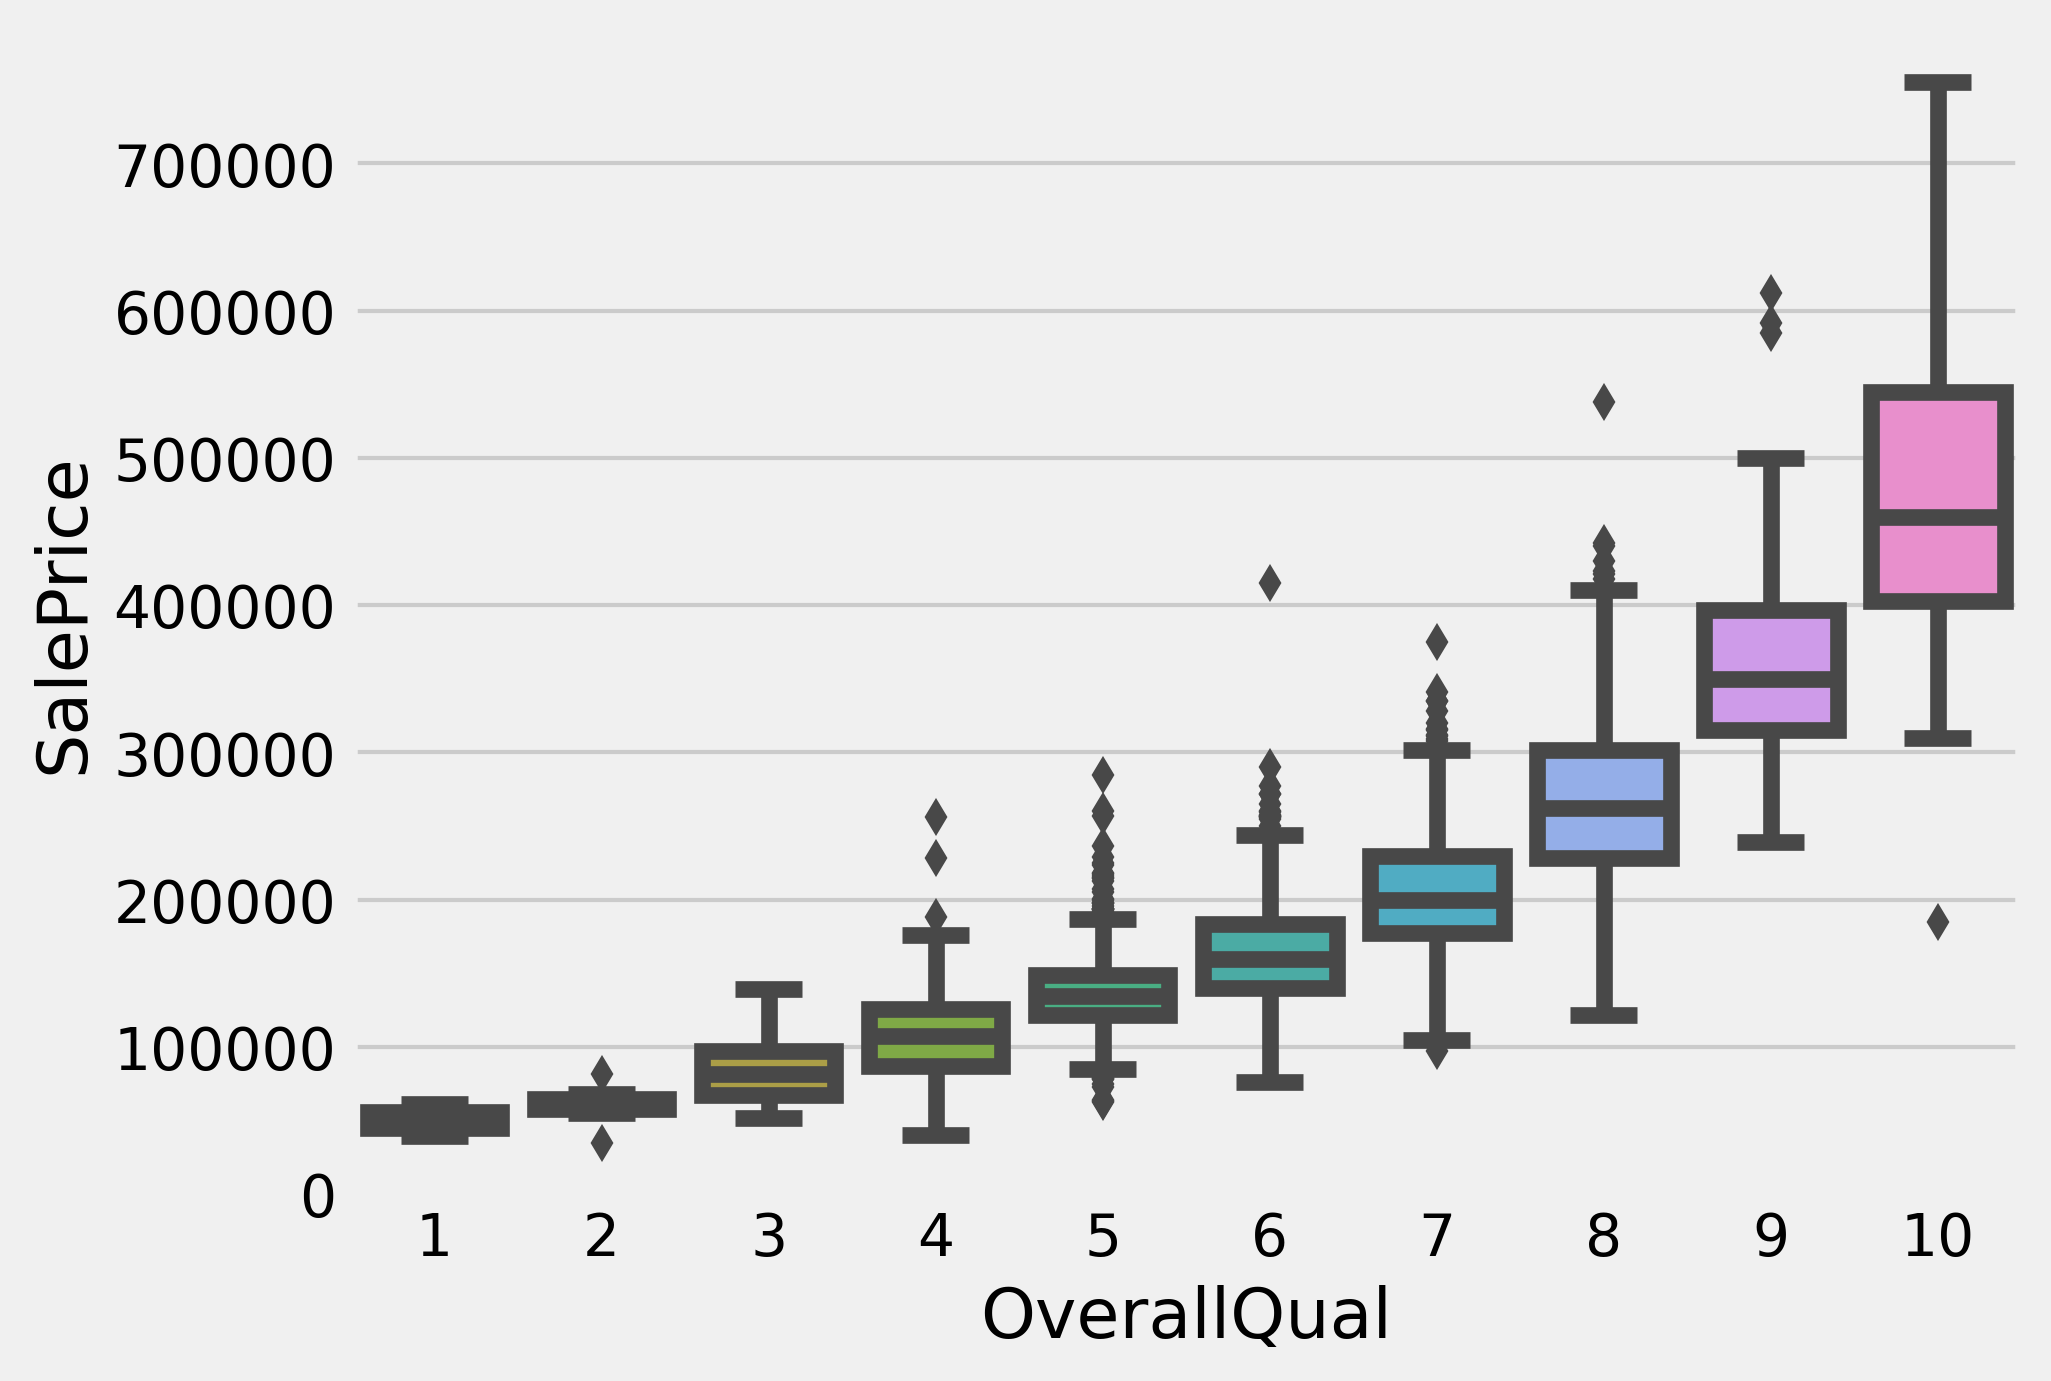

In [12]:
sns.boxplot(data = housing, x = 'OverallQual', y = 'SalePrice')
plt.show()


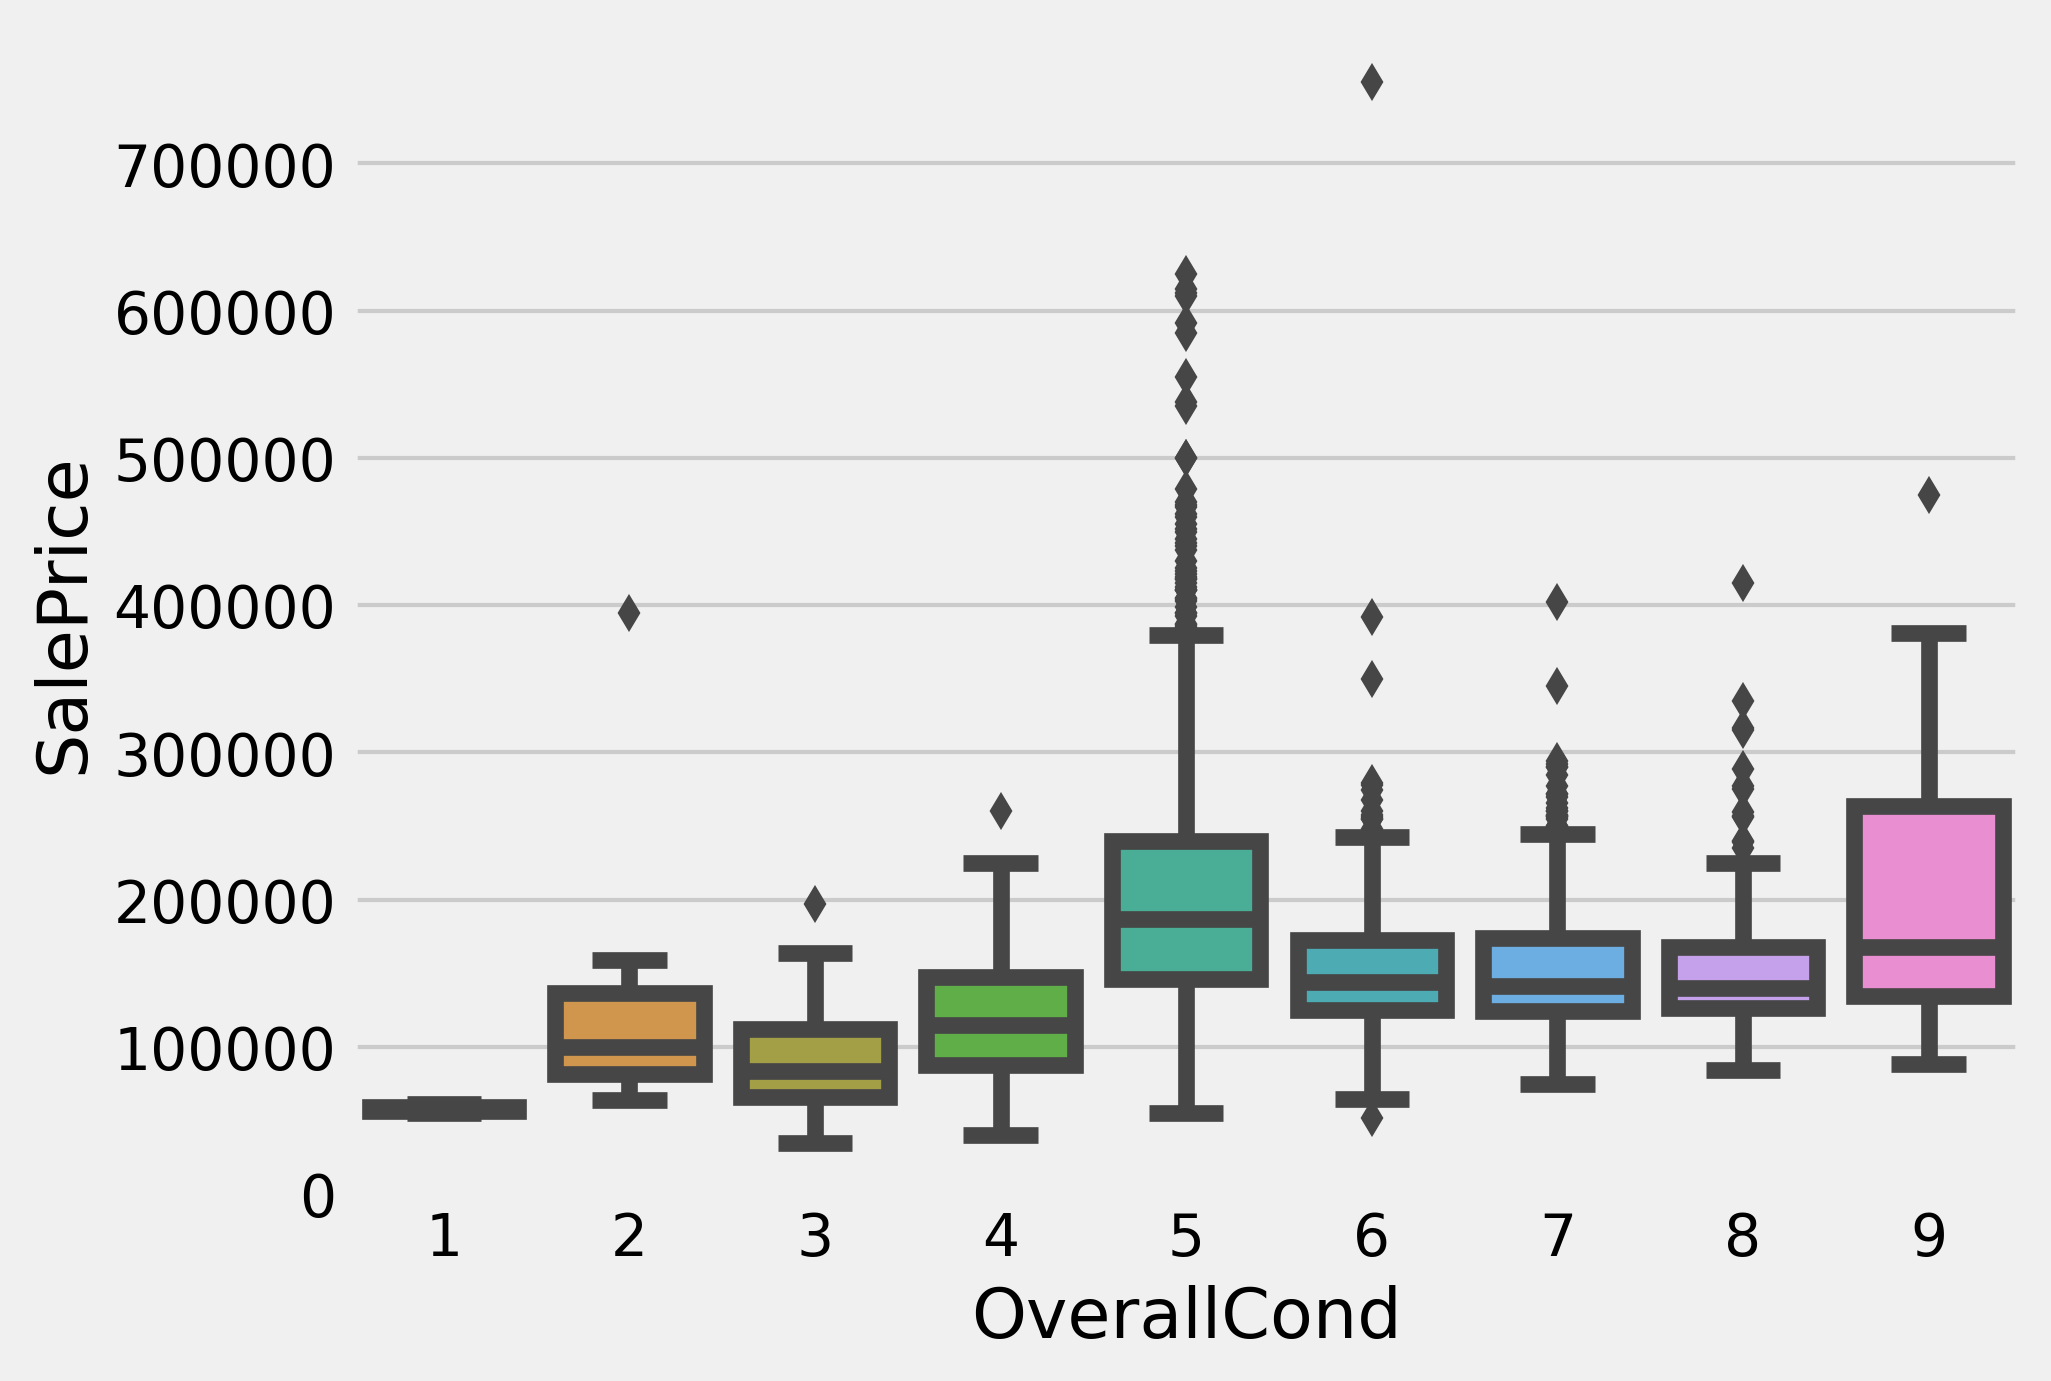

In [13]:
sns.boxplot(data = housing, x = 'OverallCond', y = 'SalePrice')
plt.show()



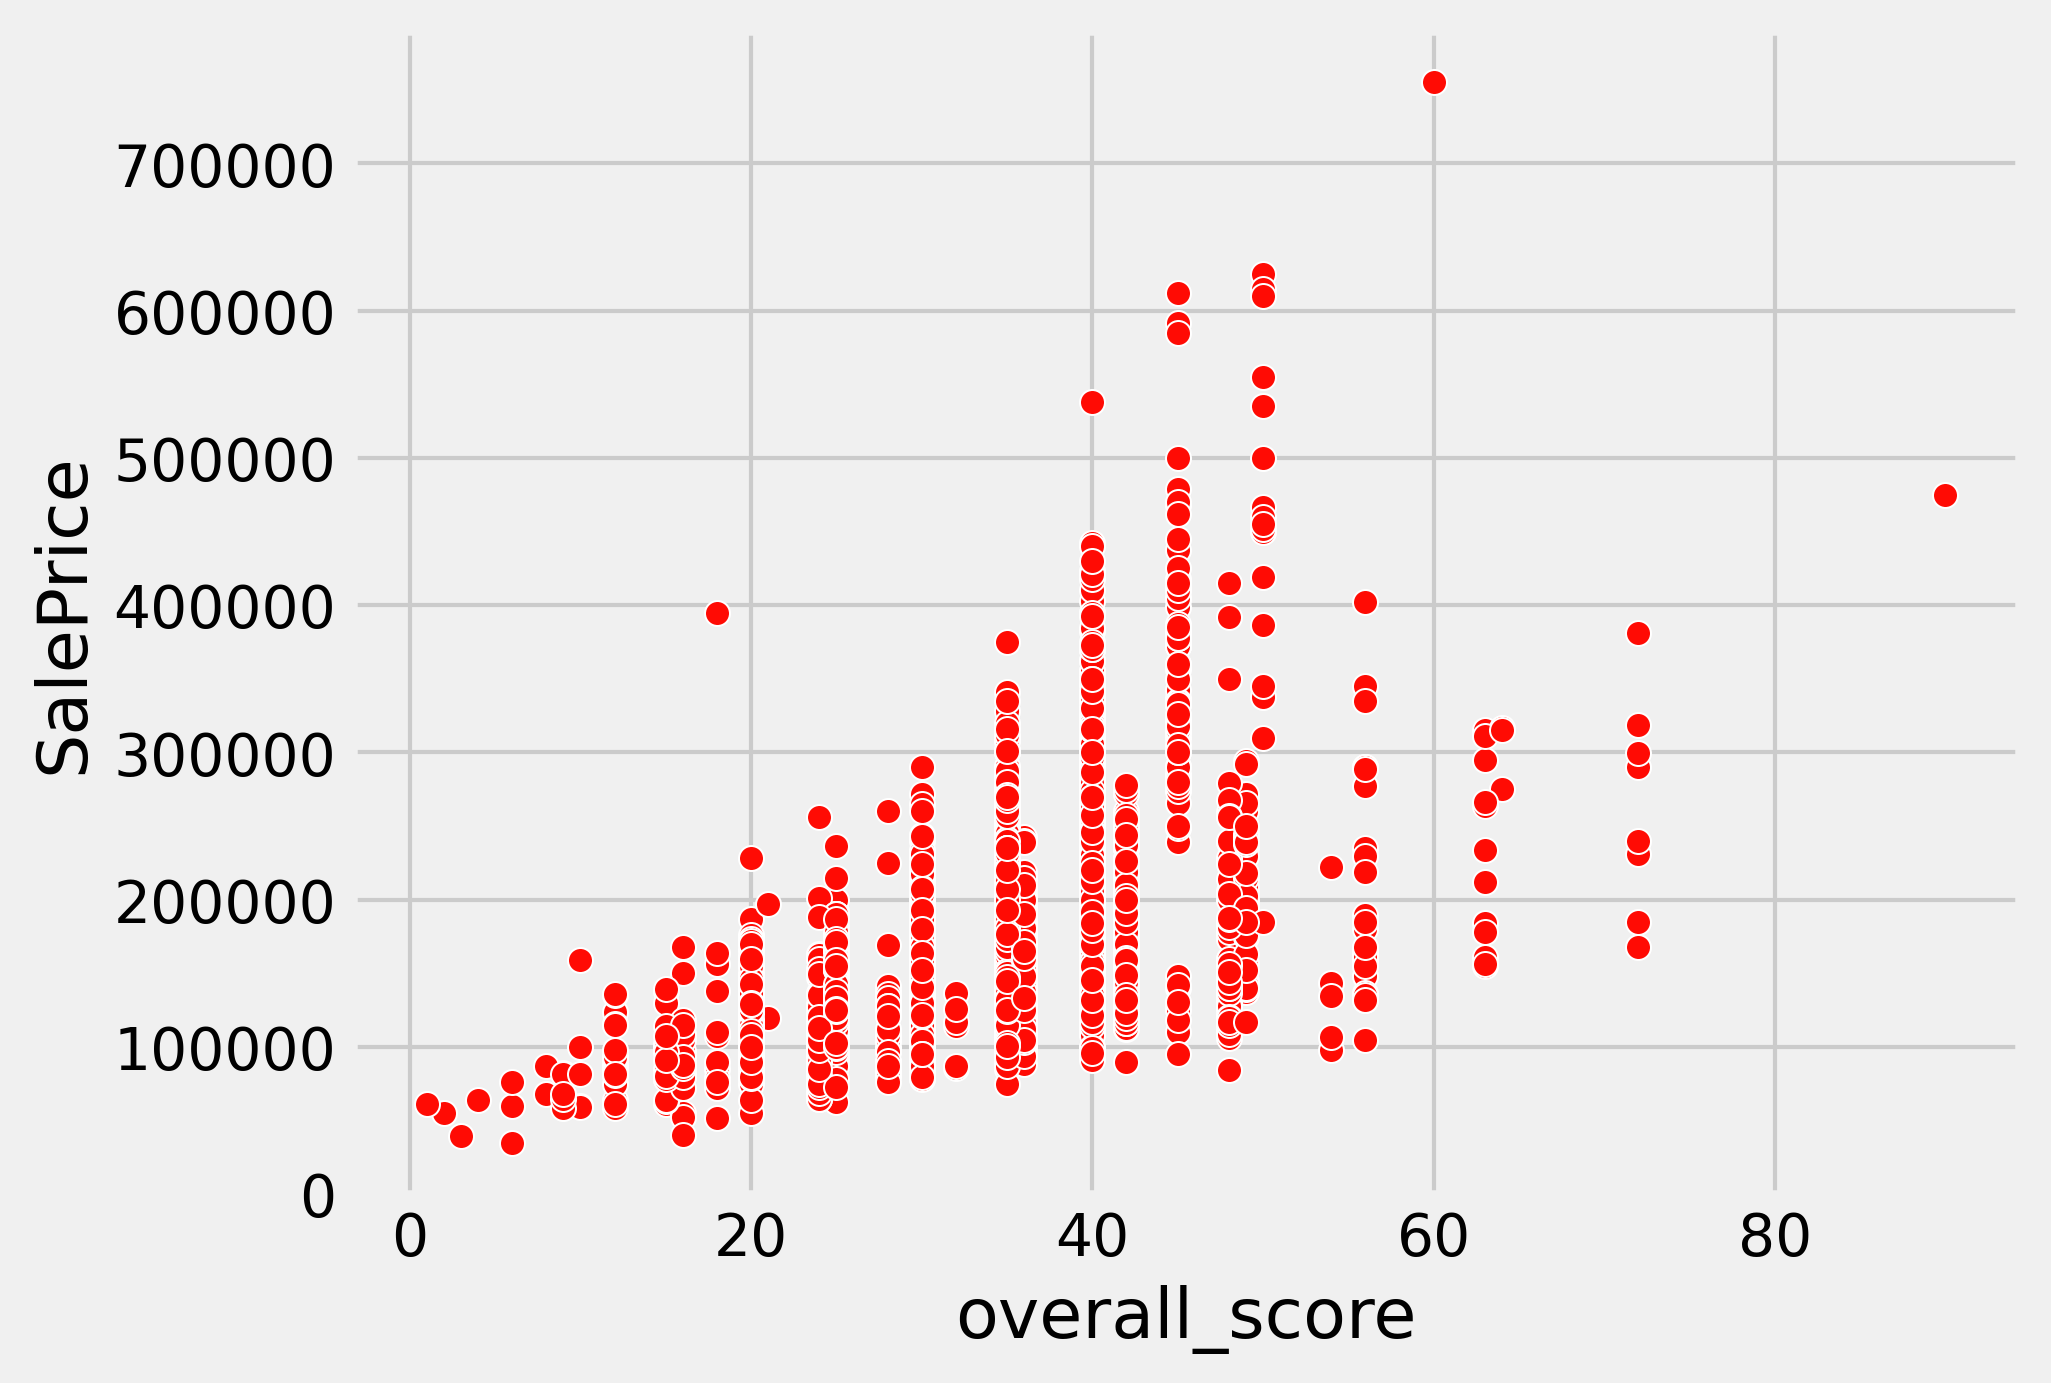

In [14]:
sns.scatterplot(data = housing, x = 'overall_score', y = 'SalePrice')
plt.show()

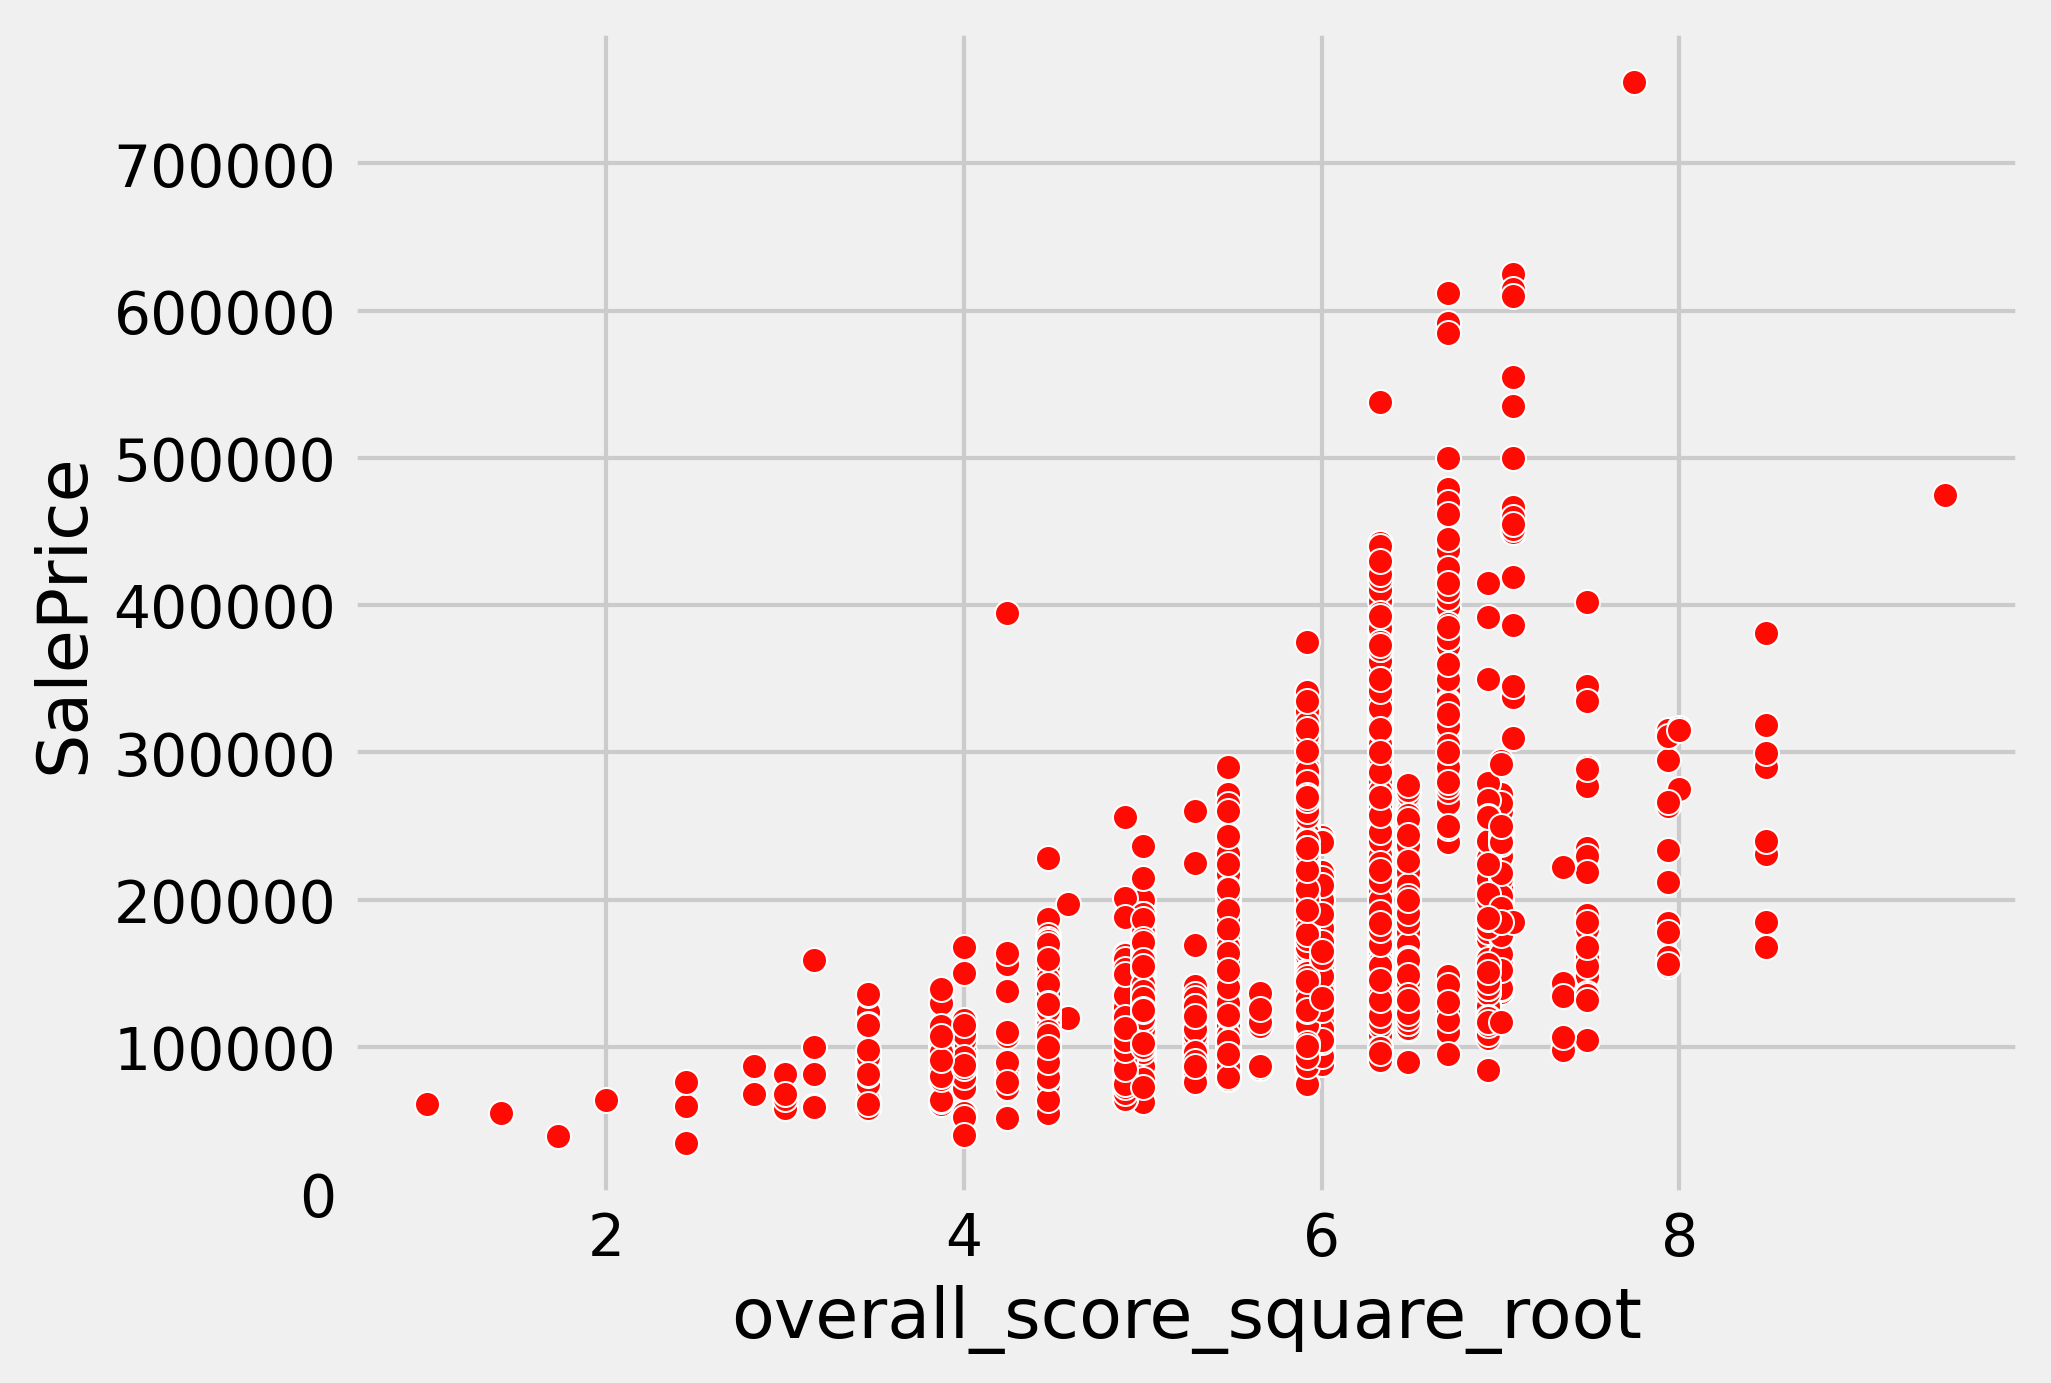

In [15]:
sns.scatterplot(data = housing, x = 'overall_score_square_root', y = 'SalePrice')
plt.show()

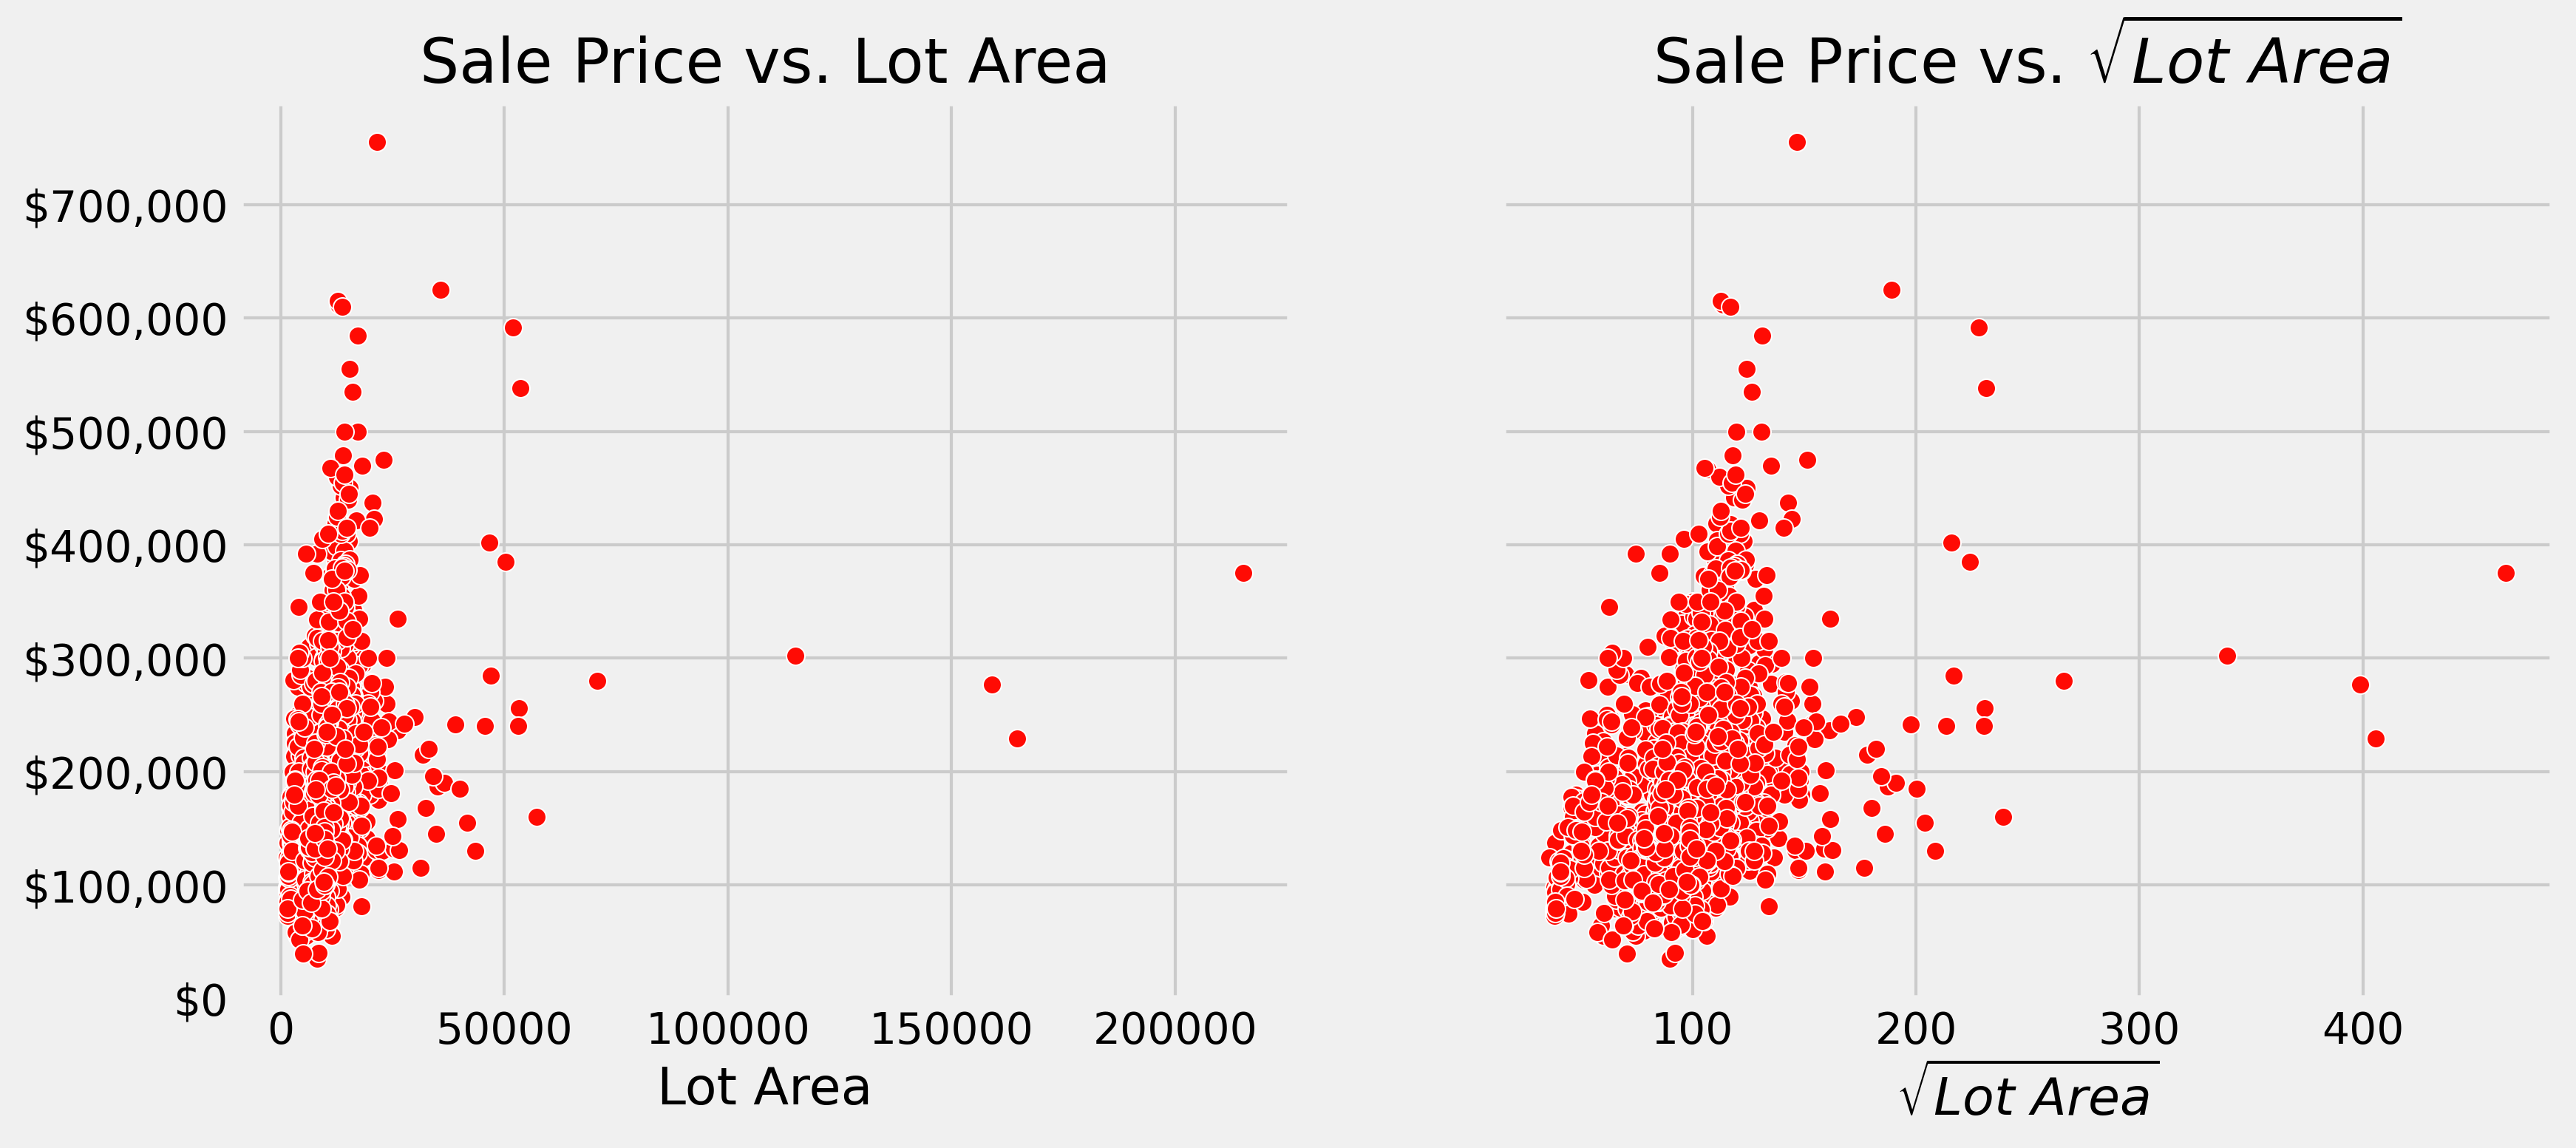

In [53]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5), 
                              sharey= True, 
#                               constrained_layout = True
                             )
g = sns.scatterplot(data = housing, x = 'LotArea', y = 'SalePrice', ax = ax1)
g.set(xlabel='Lot Area', ylabel='',title=f'Sale Price vs. Lot Area')
ax1.yaxis.set_major_formatter('${x:,.0f}')

g = sns.scatterplot(data = housing, x = 'LotArea_square_root', y = 'SalePrice', ax = ax2,
#                    color = colors[1]
                   )
g.set(xlabel='$\sqrt{Lot\ Area}$', ylabel='',title=r'Sale Price vs. $\sqrt{Lot\ Area}$')

plt.show()

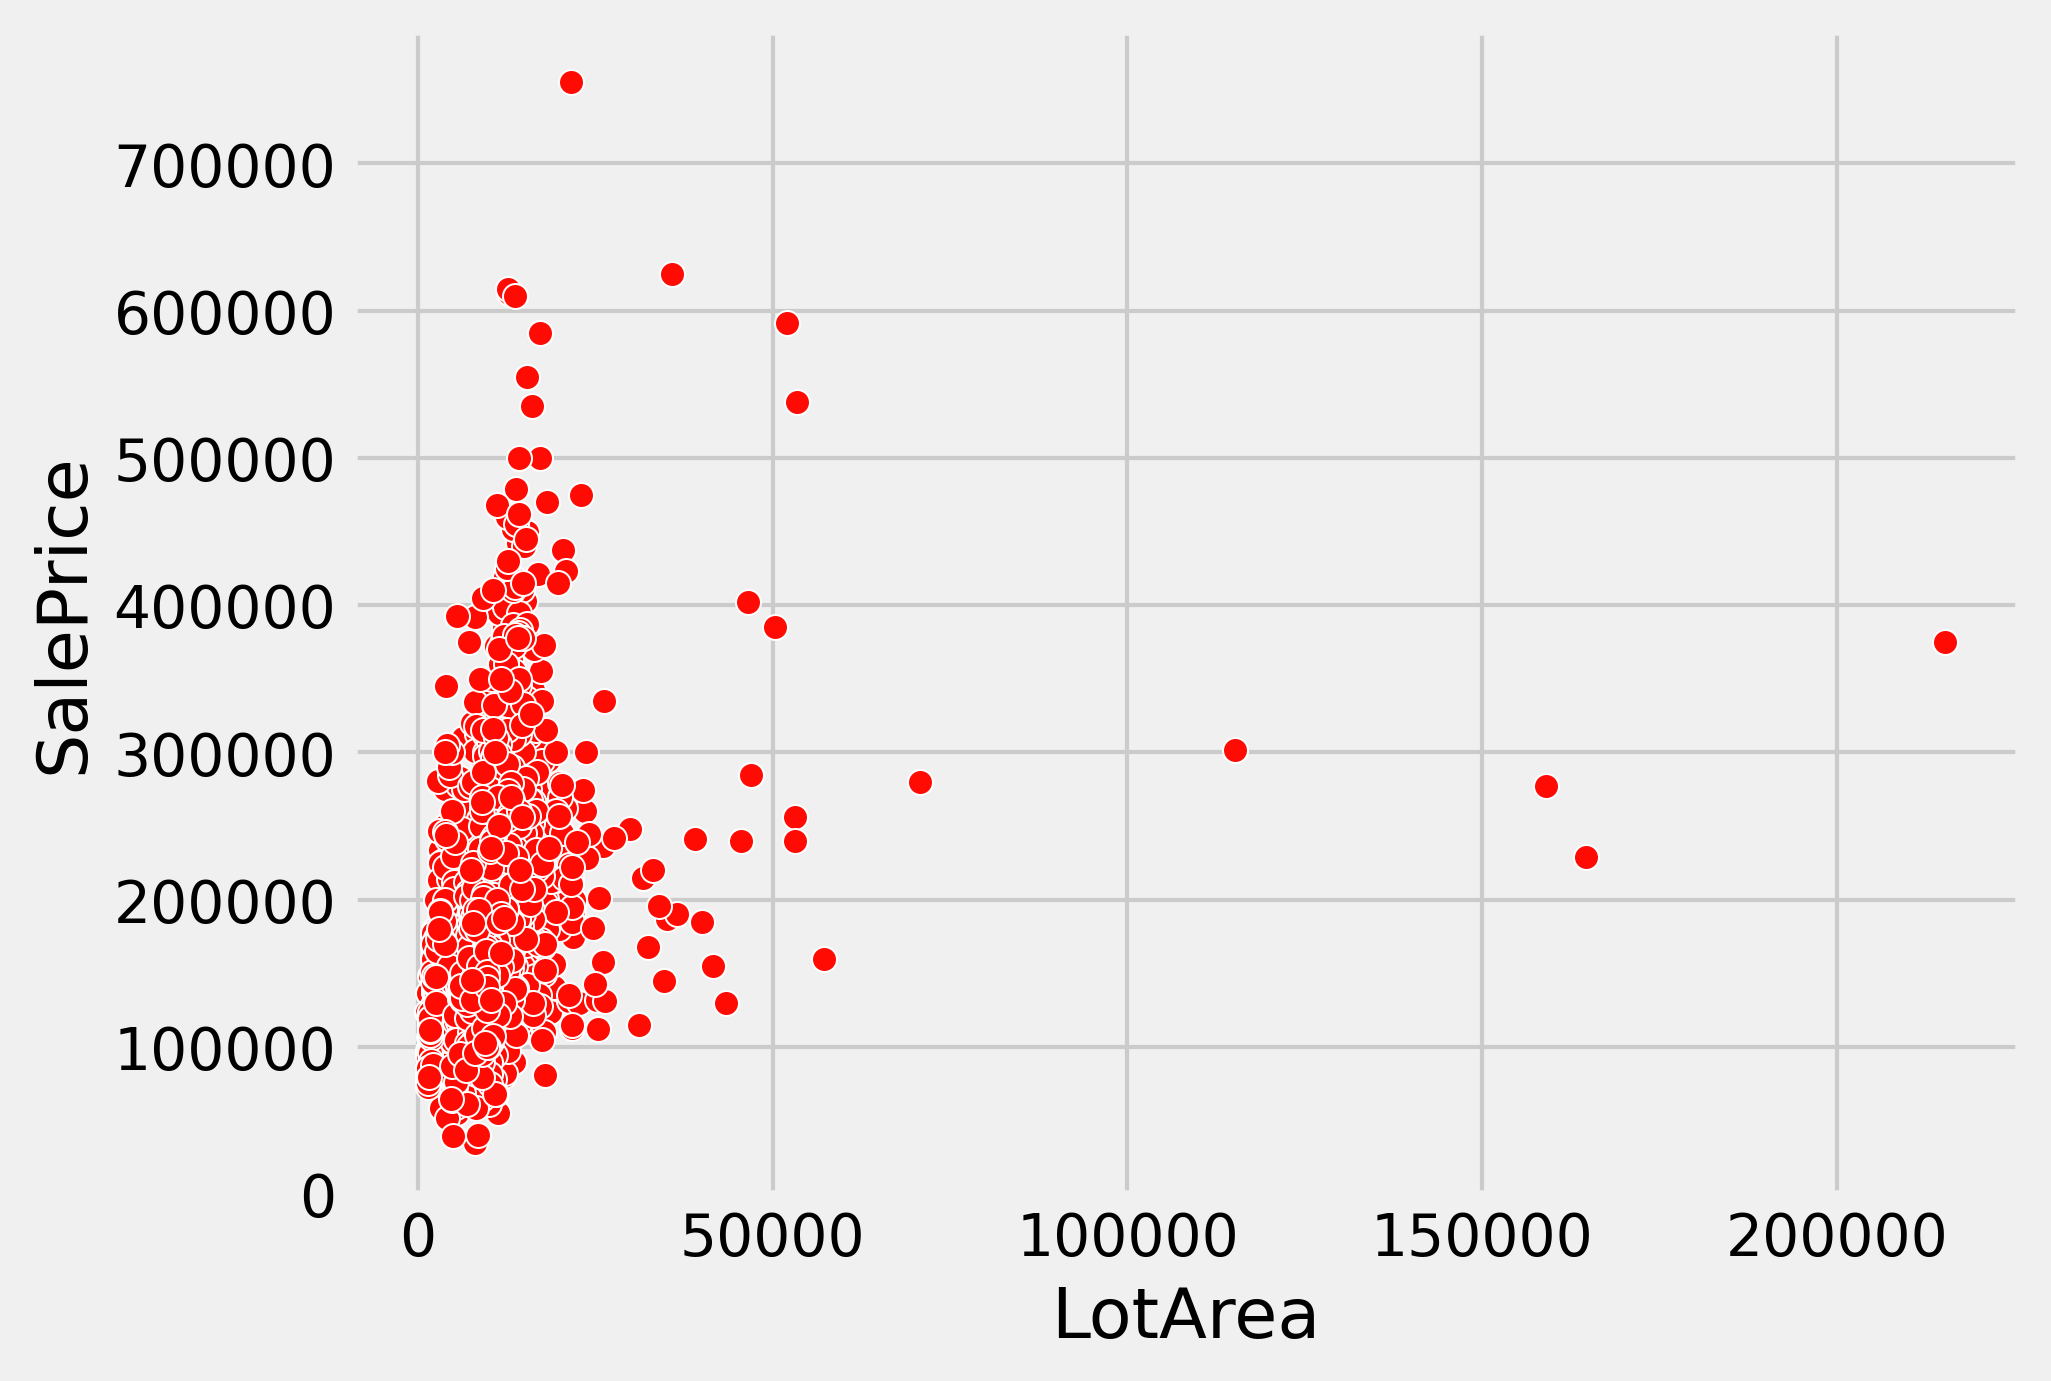

In [16]:
sns.scatterplot(data = housing, x = 'LotArea', y = 'SalePrice')
plt.show()

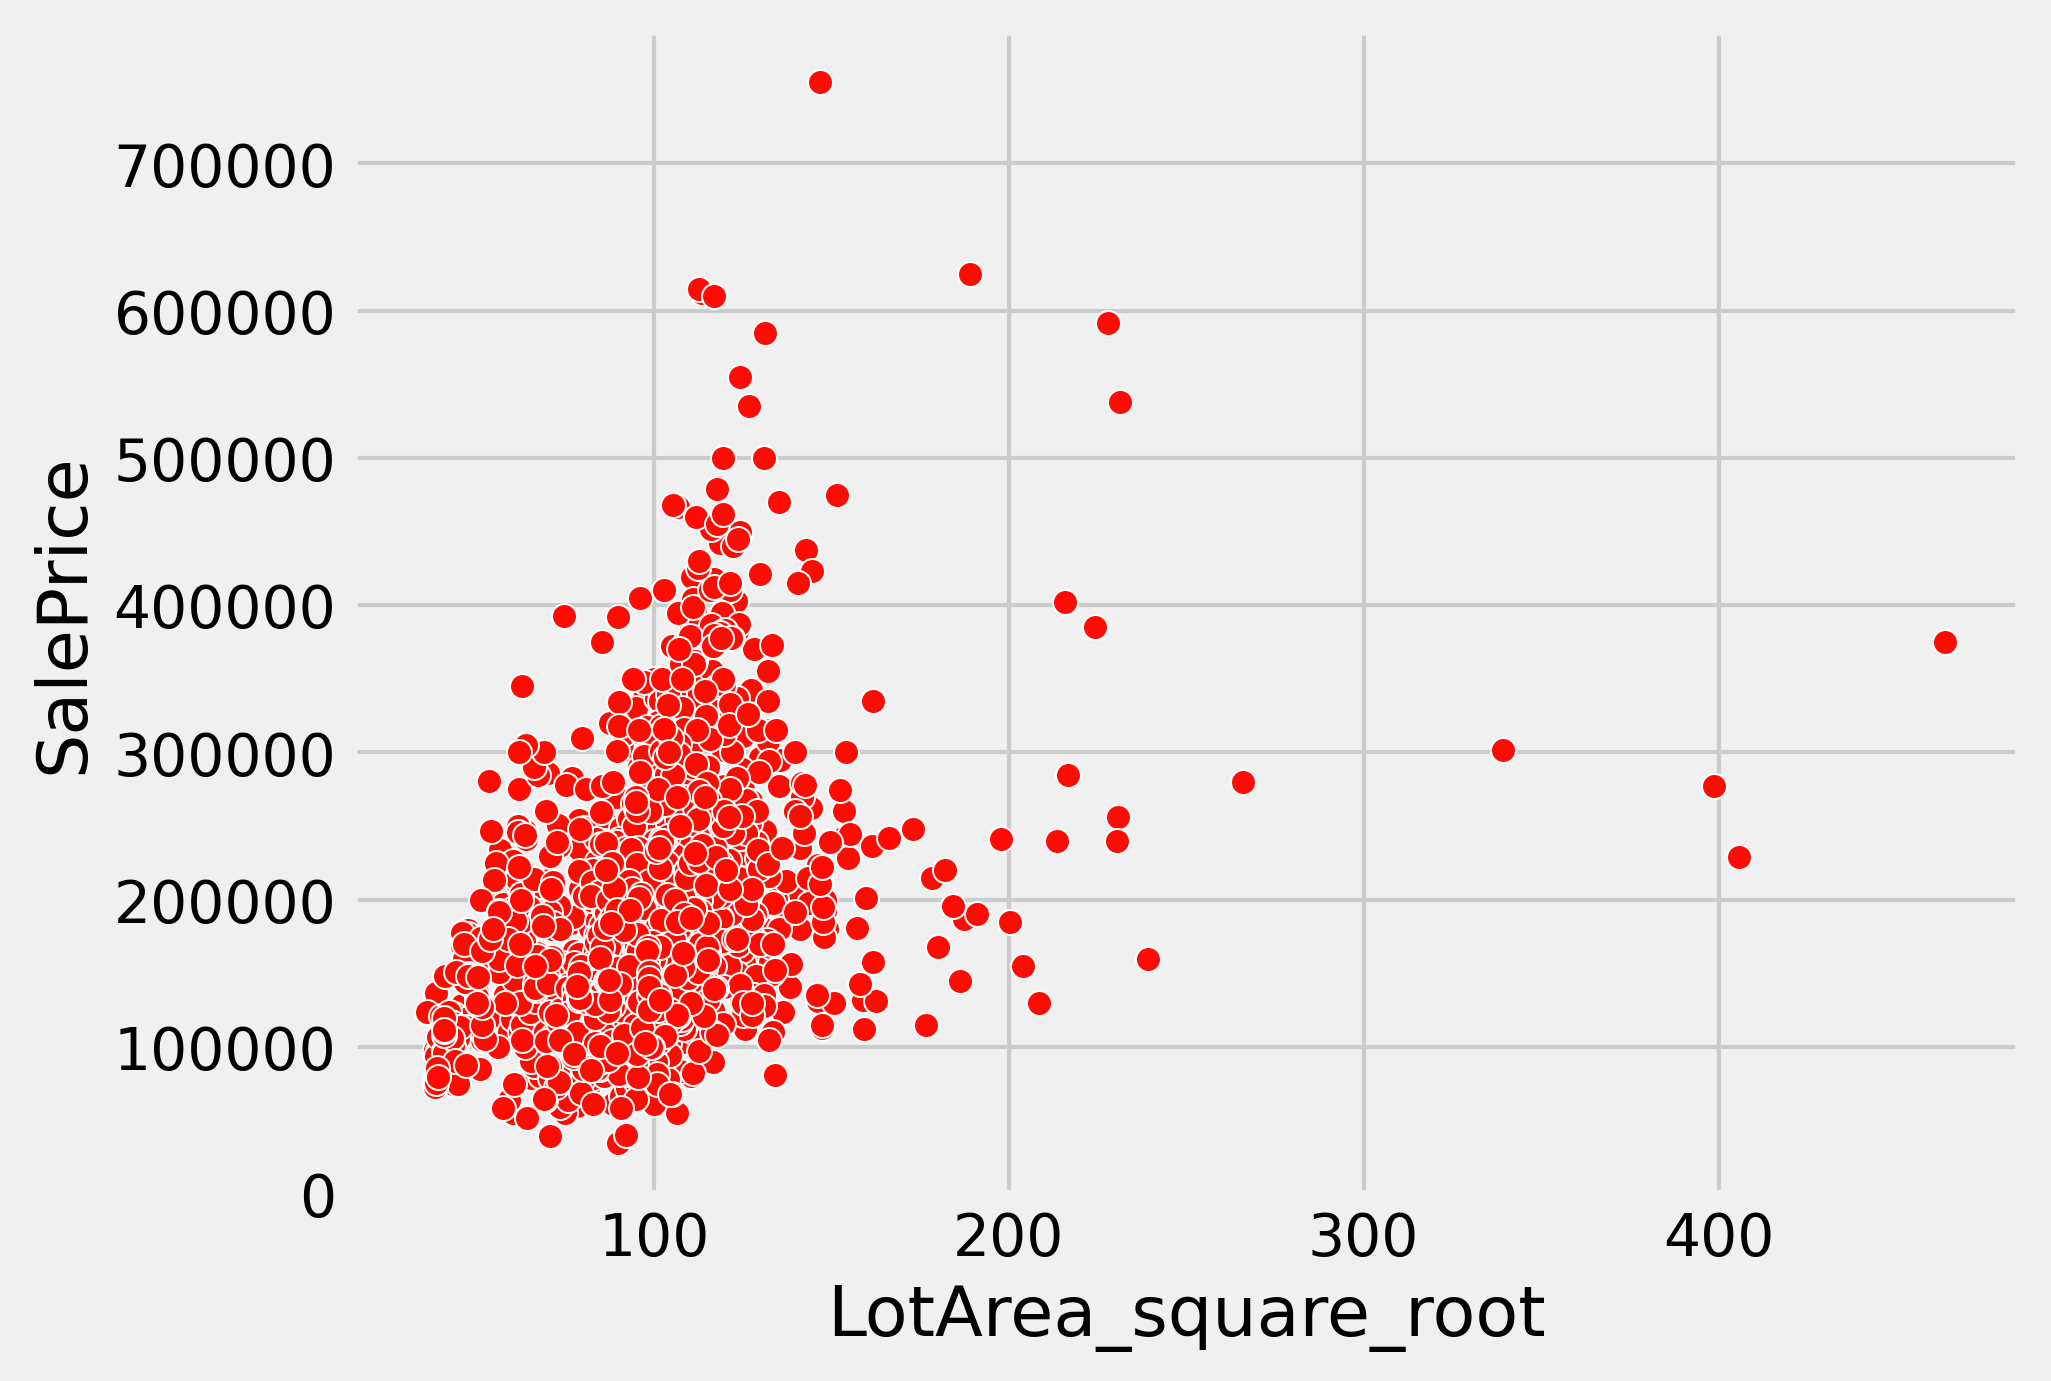

In [17]:
sns.scatterplot(data = housing, x = 'LotArea_square_root', y = 'SalePrice')
plt.show()

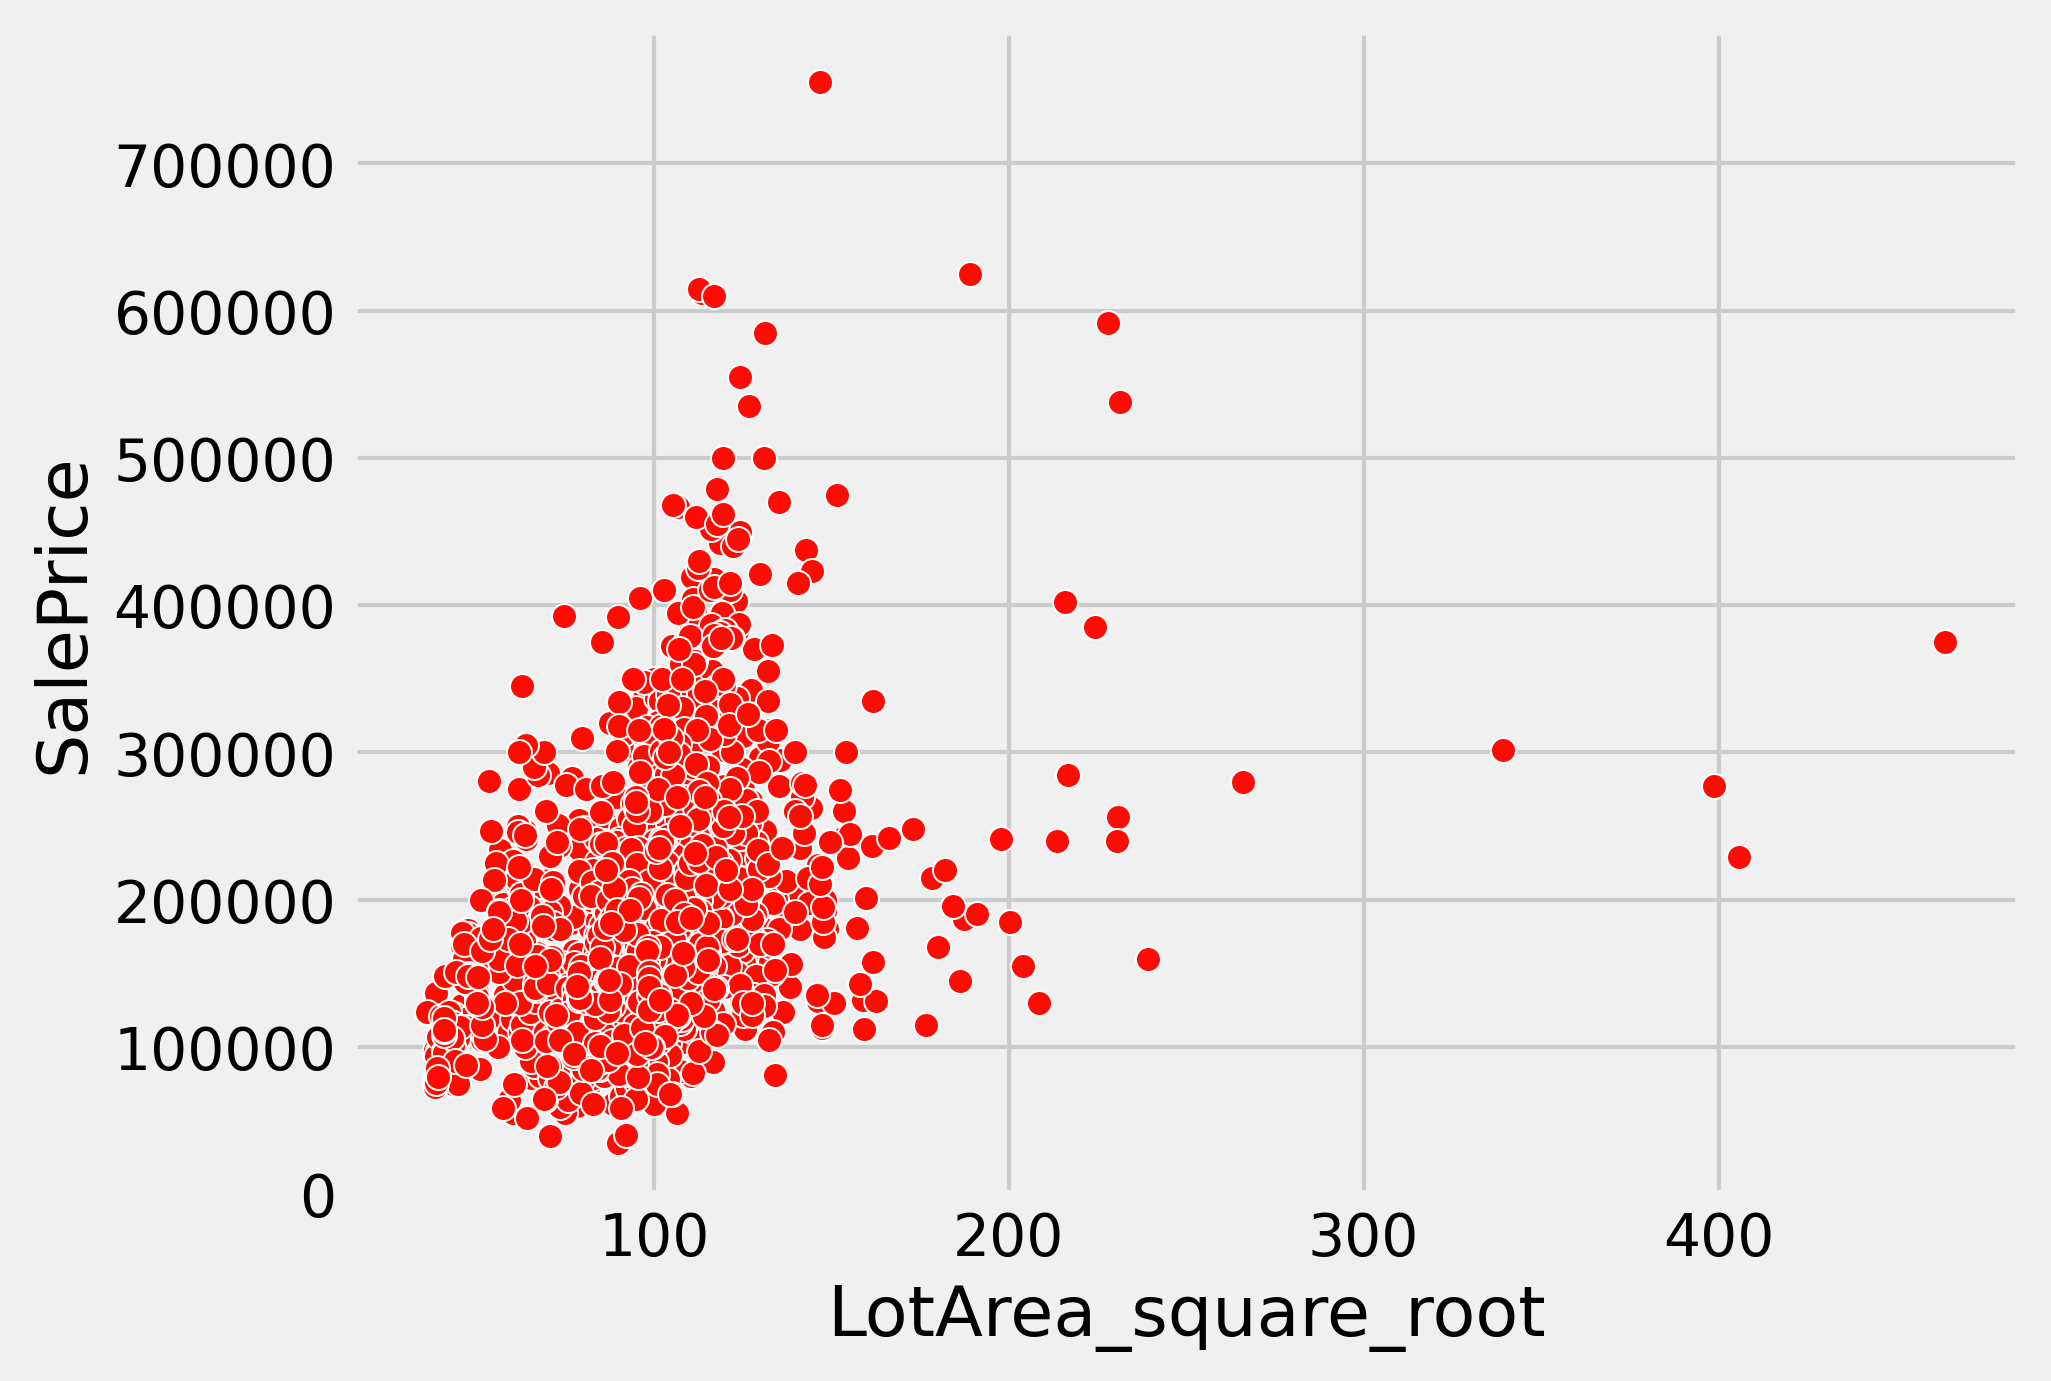

In [18]:
sns.scatterplot(data = housing, x = 'LotArea_square_root', y = 'SalePrice')
plt.show()

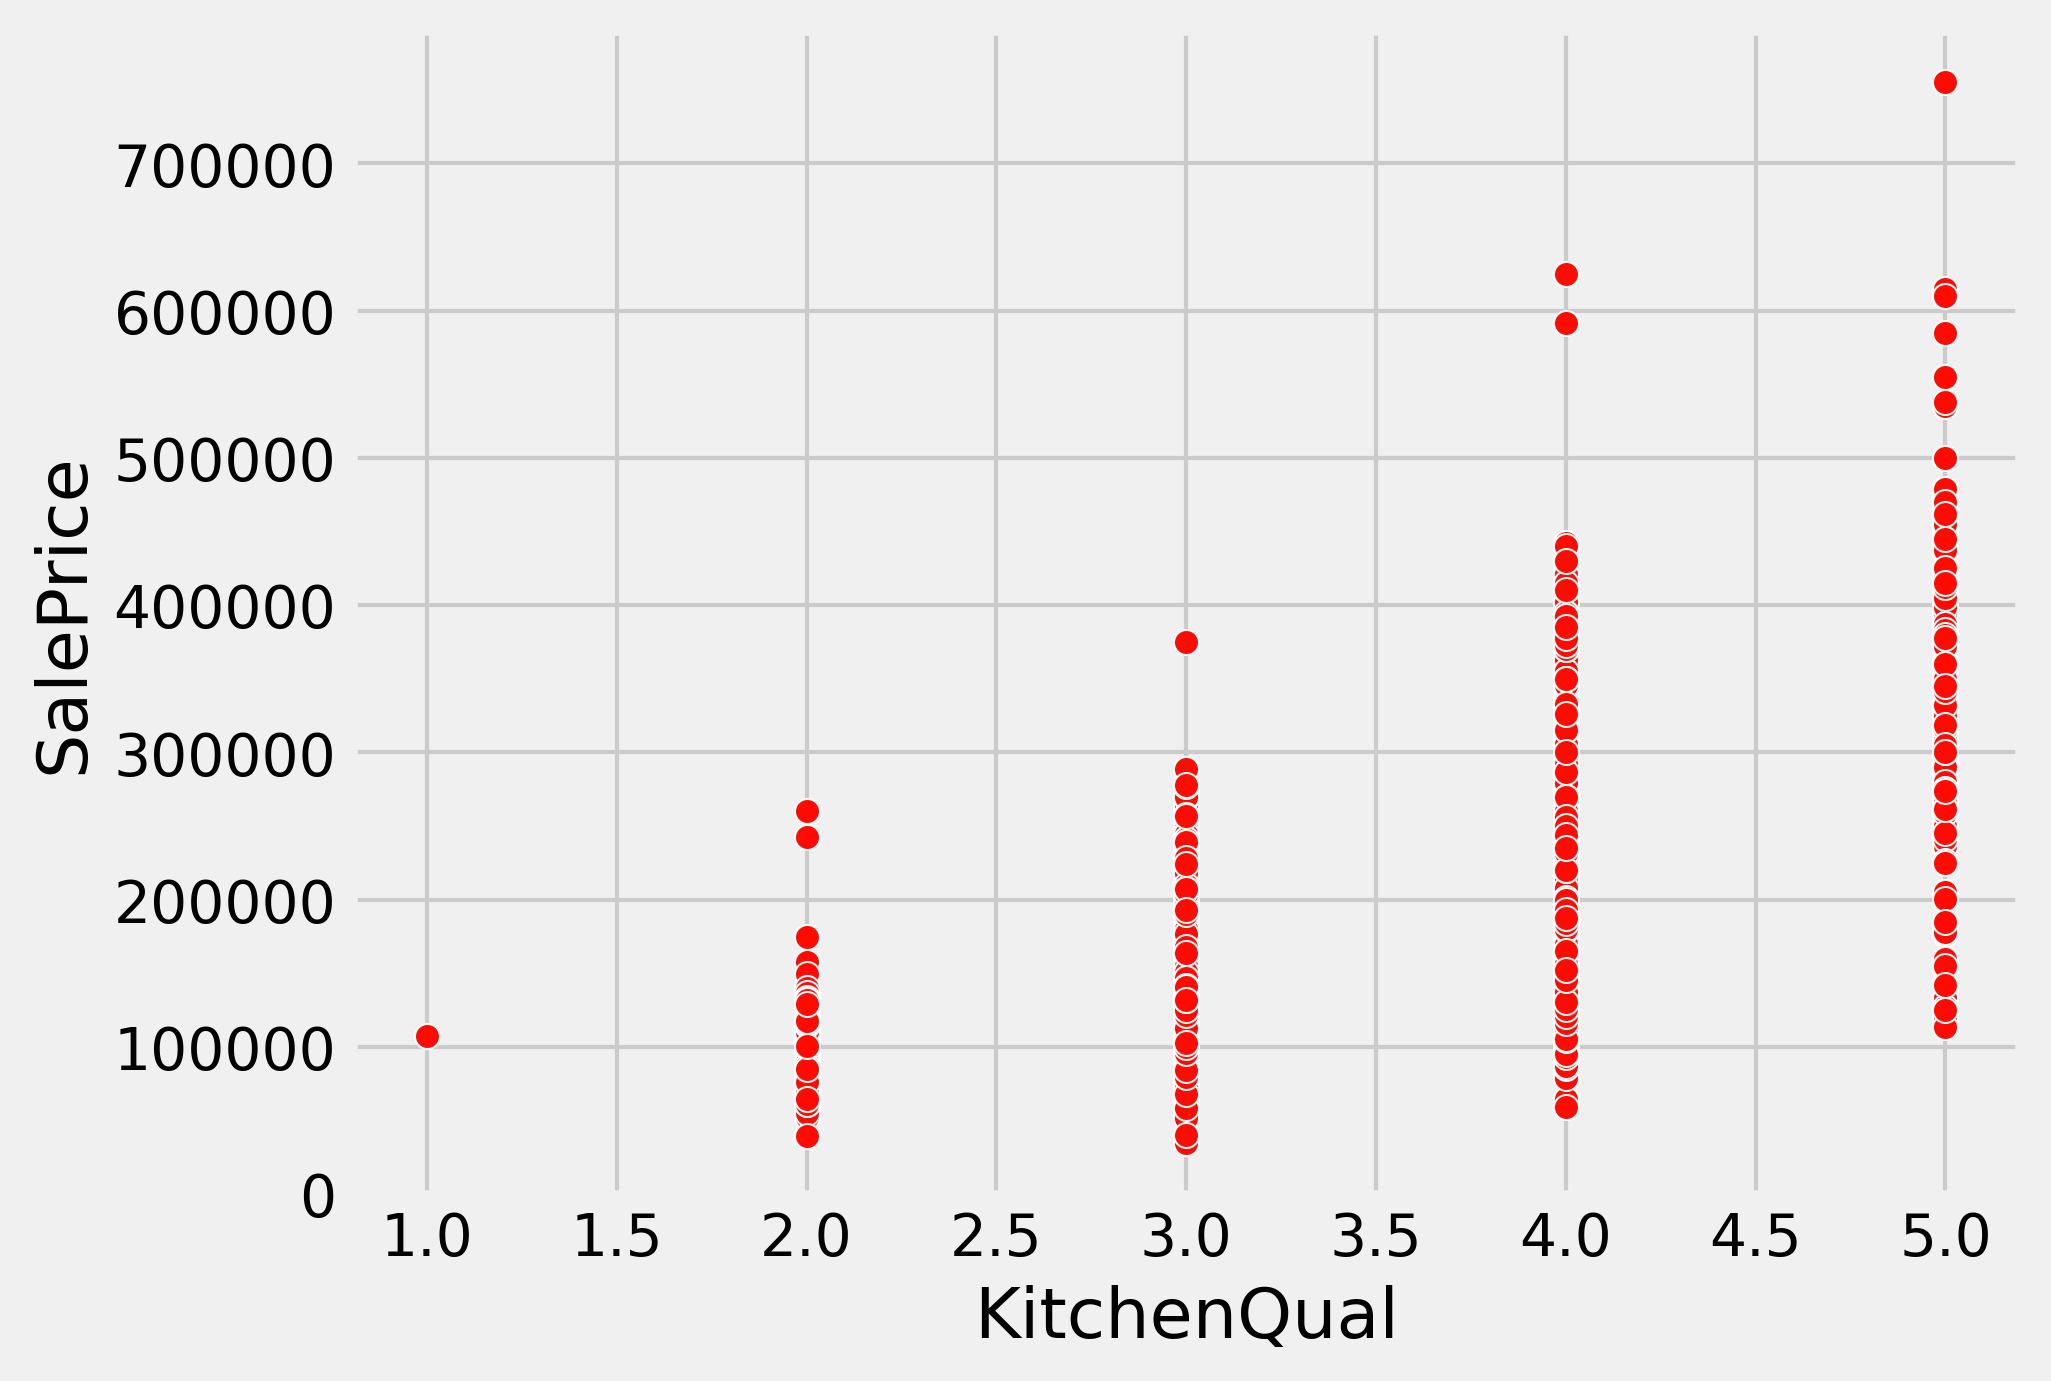

In [19]:
sns.scatterplot(data = housing, x = 'KitchenQual', y = 'SalePrice')
plt.show()

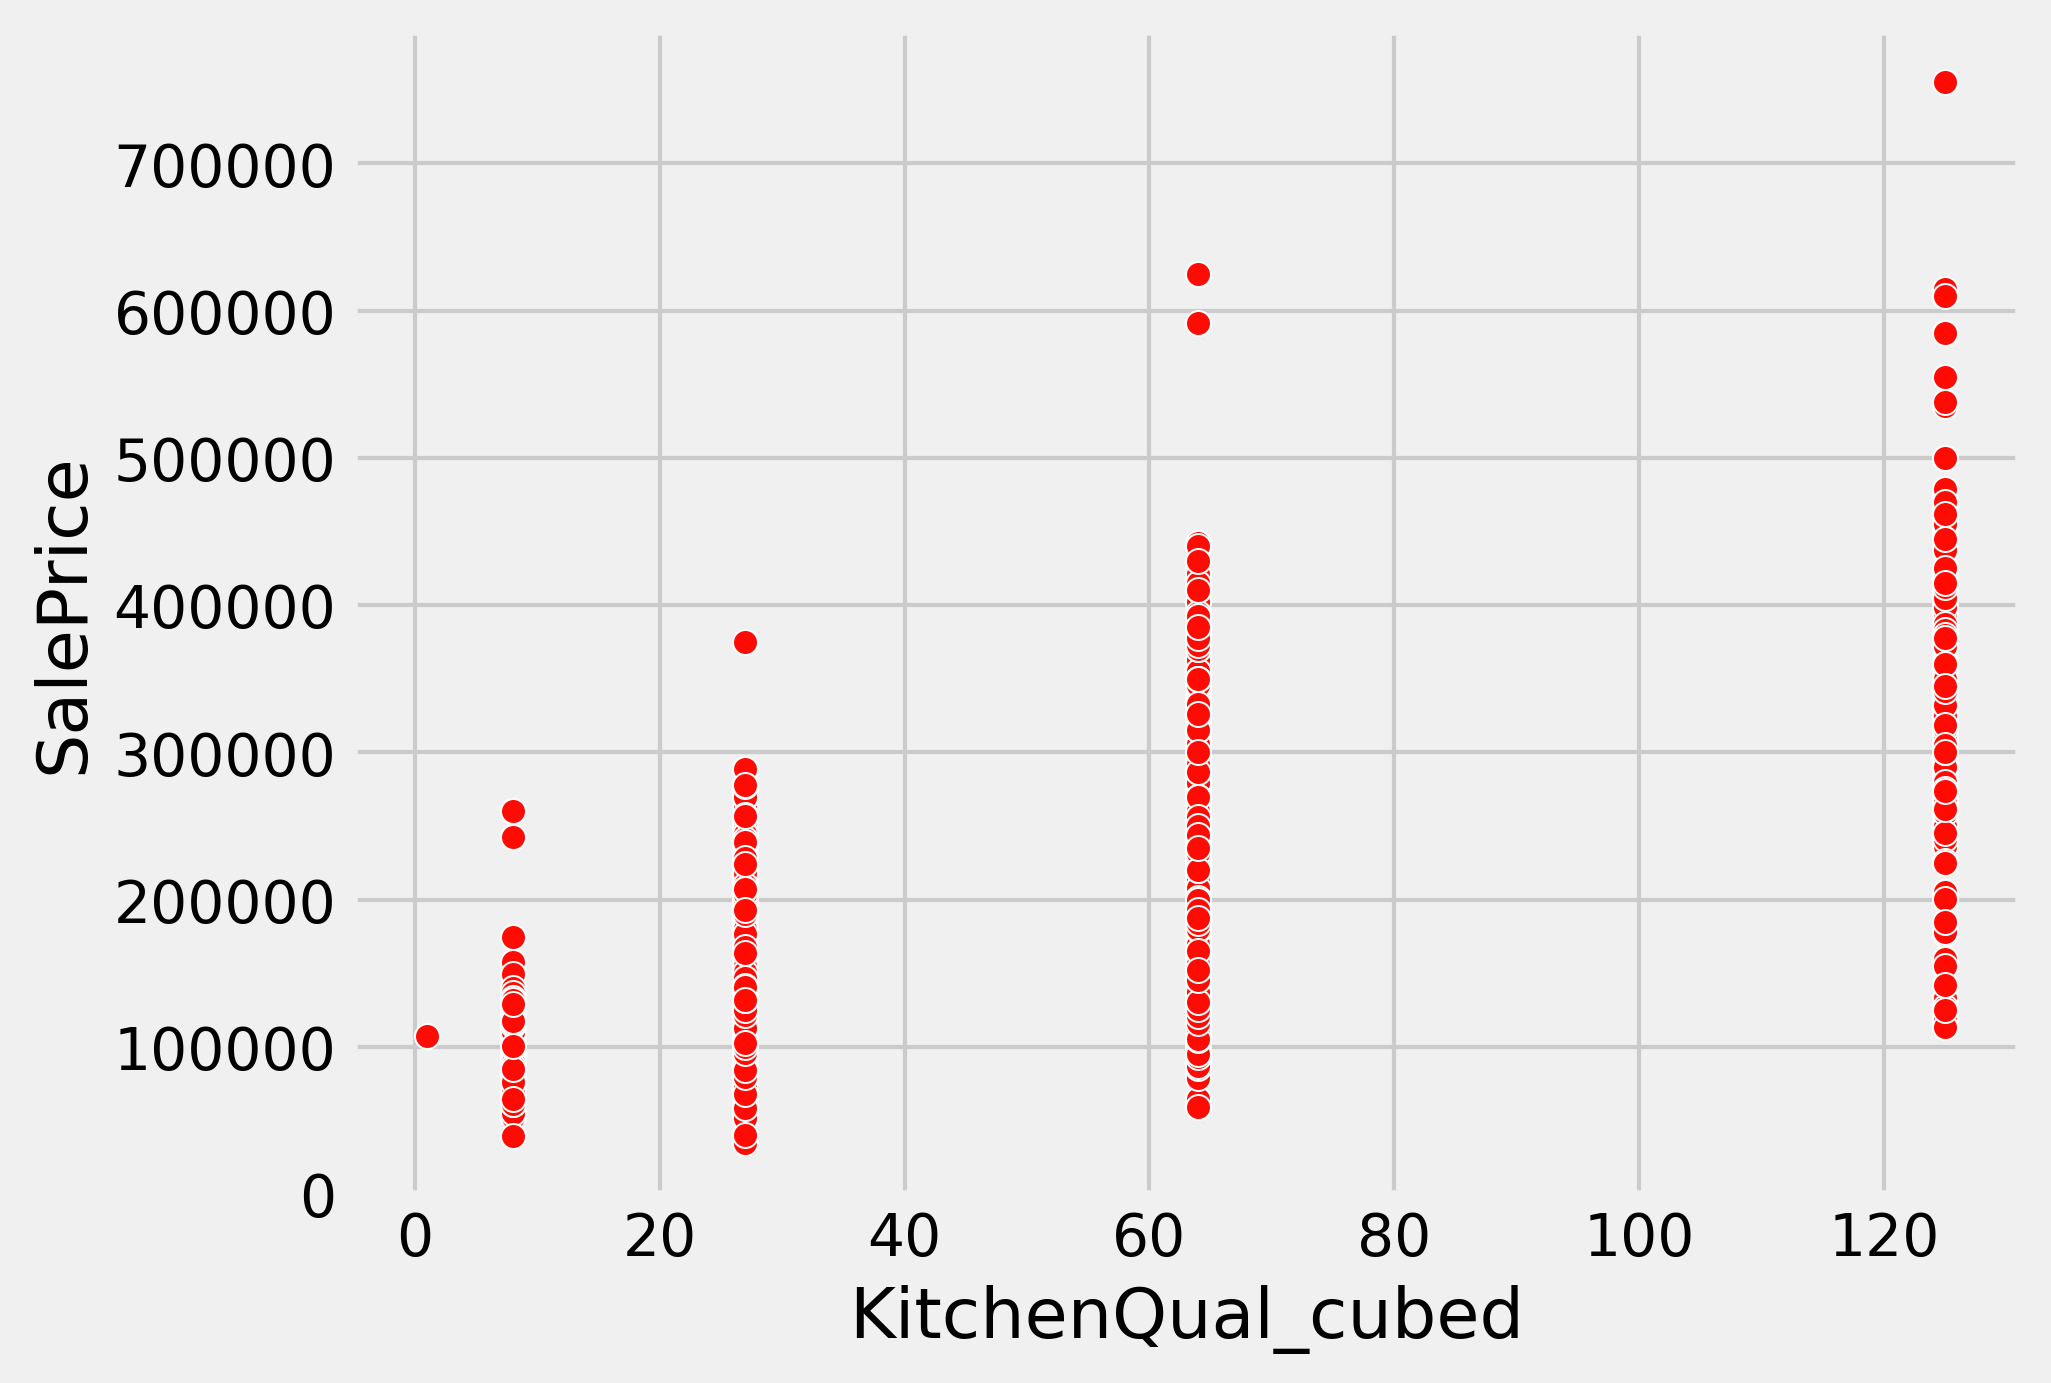

In [20]:
sns.scatterplot(data = housing, x = 'KitchenQual_cubed', y = 'SalePrice')
plt.show()

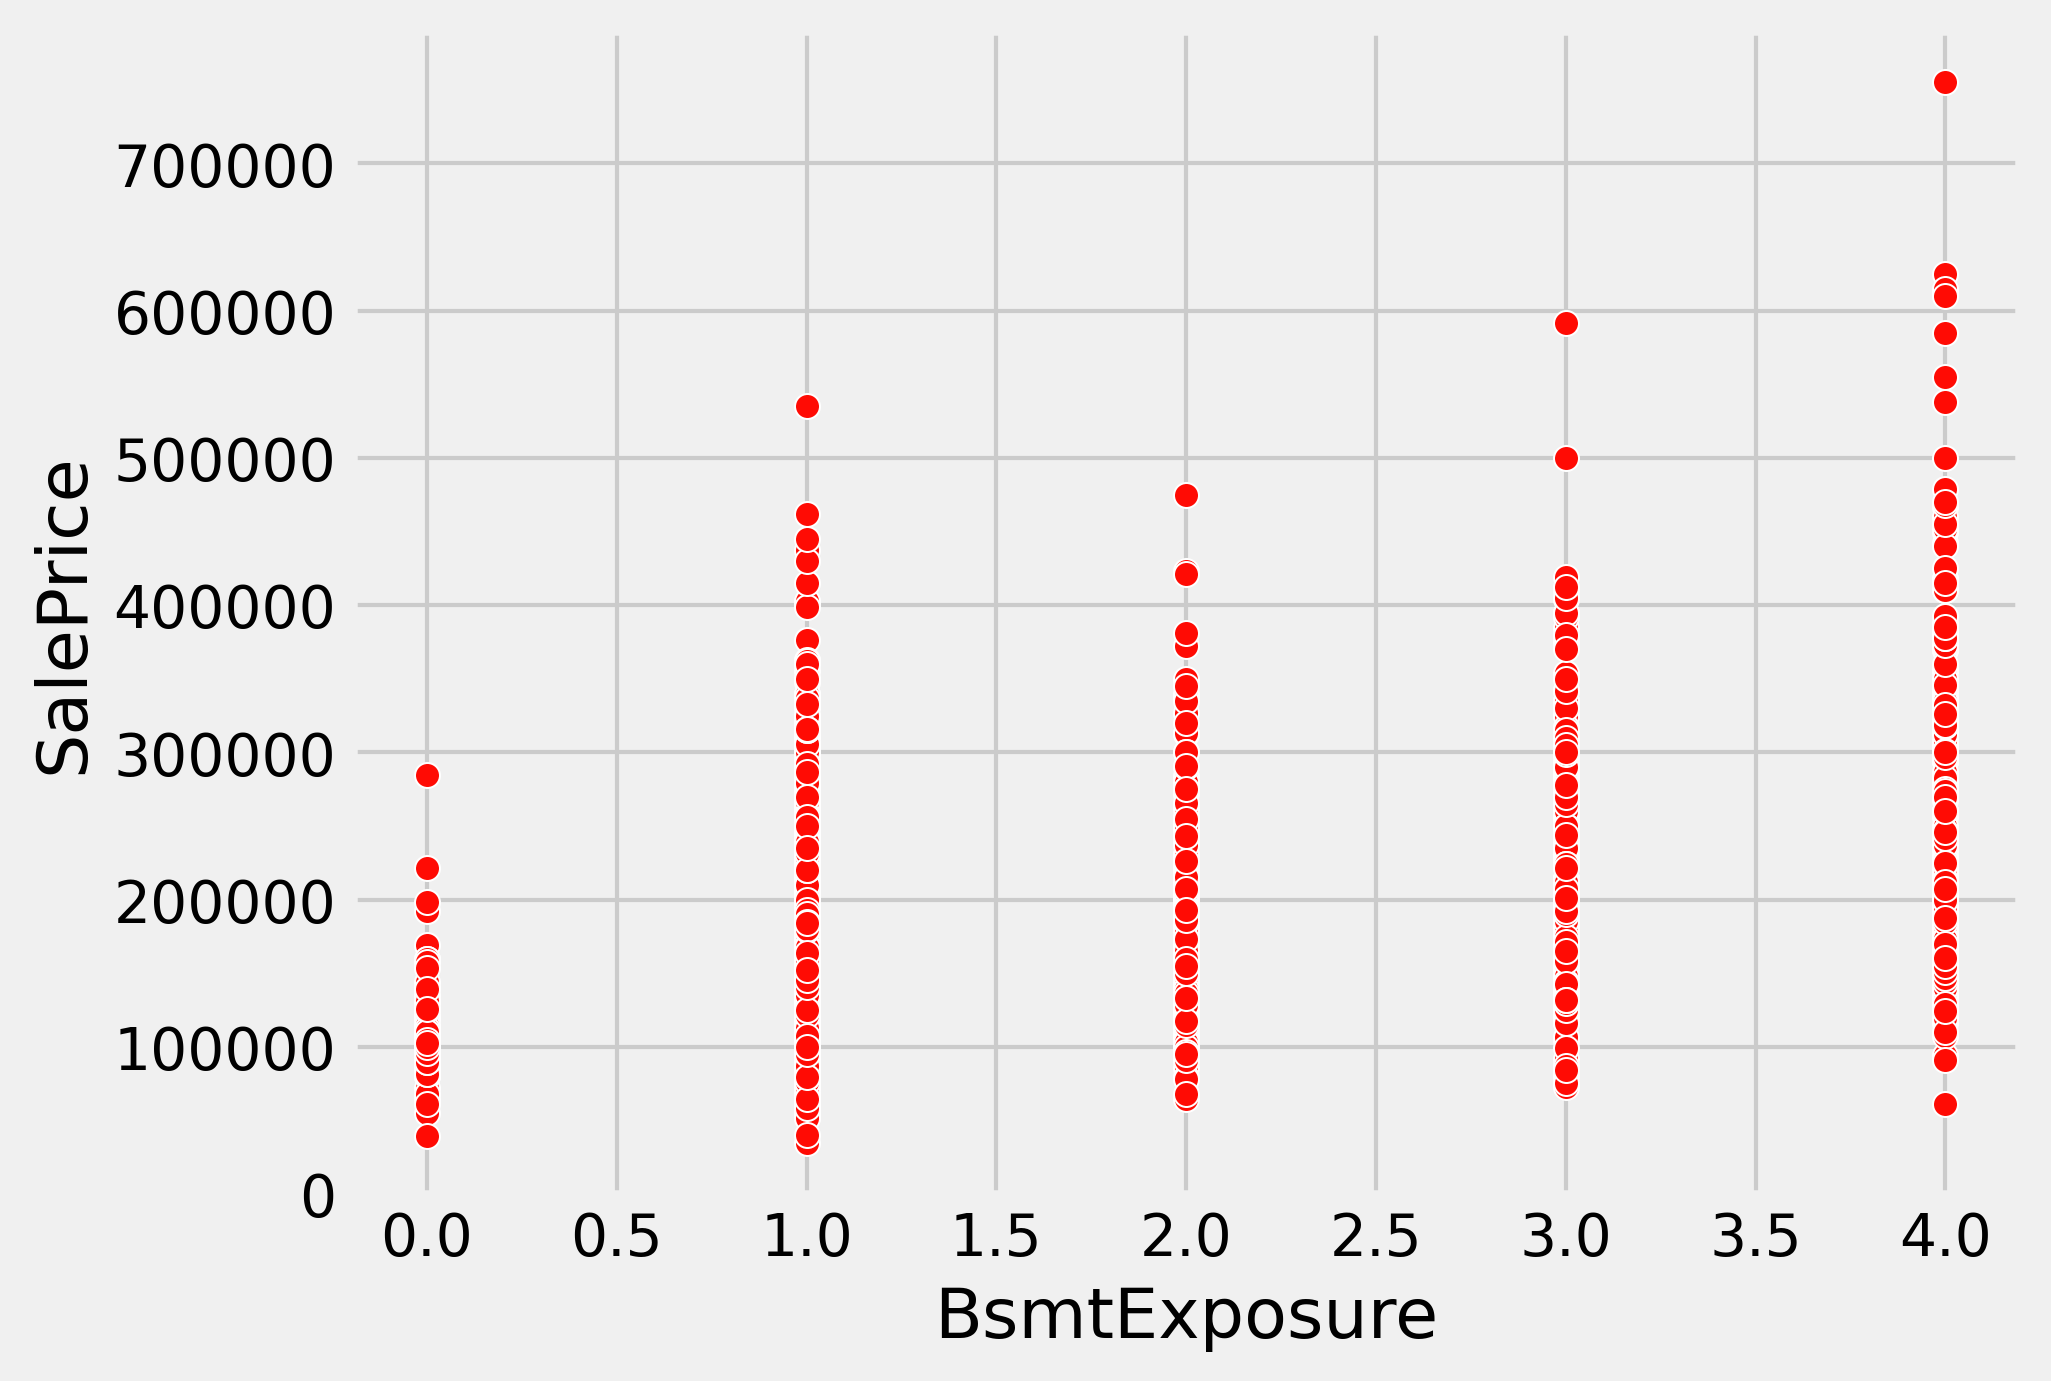

In [21]:
sns.scatterplot(data = housing, x = 'BsmtExposure', y = 'SalePrice')
plt.show()

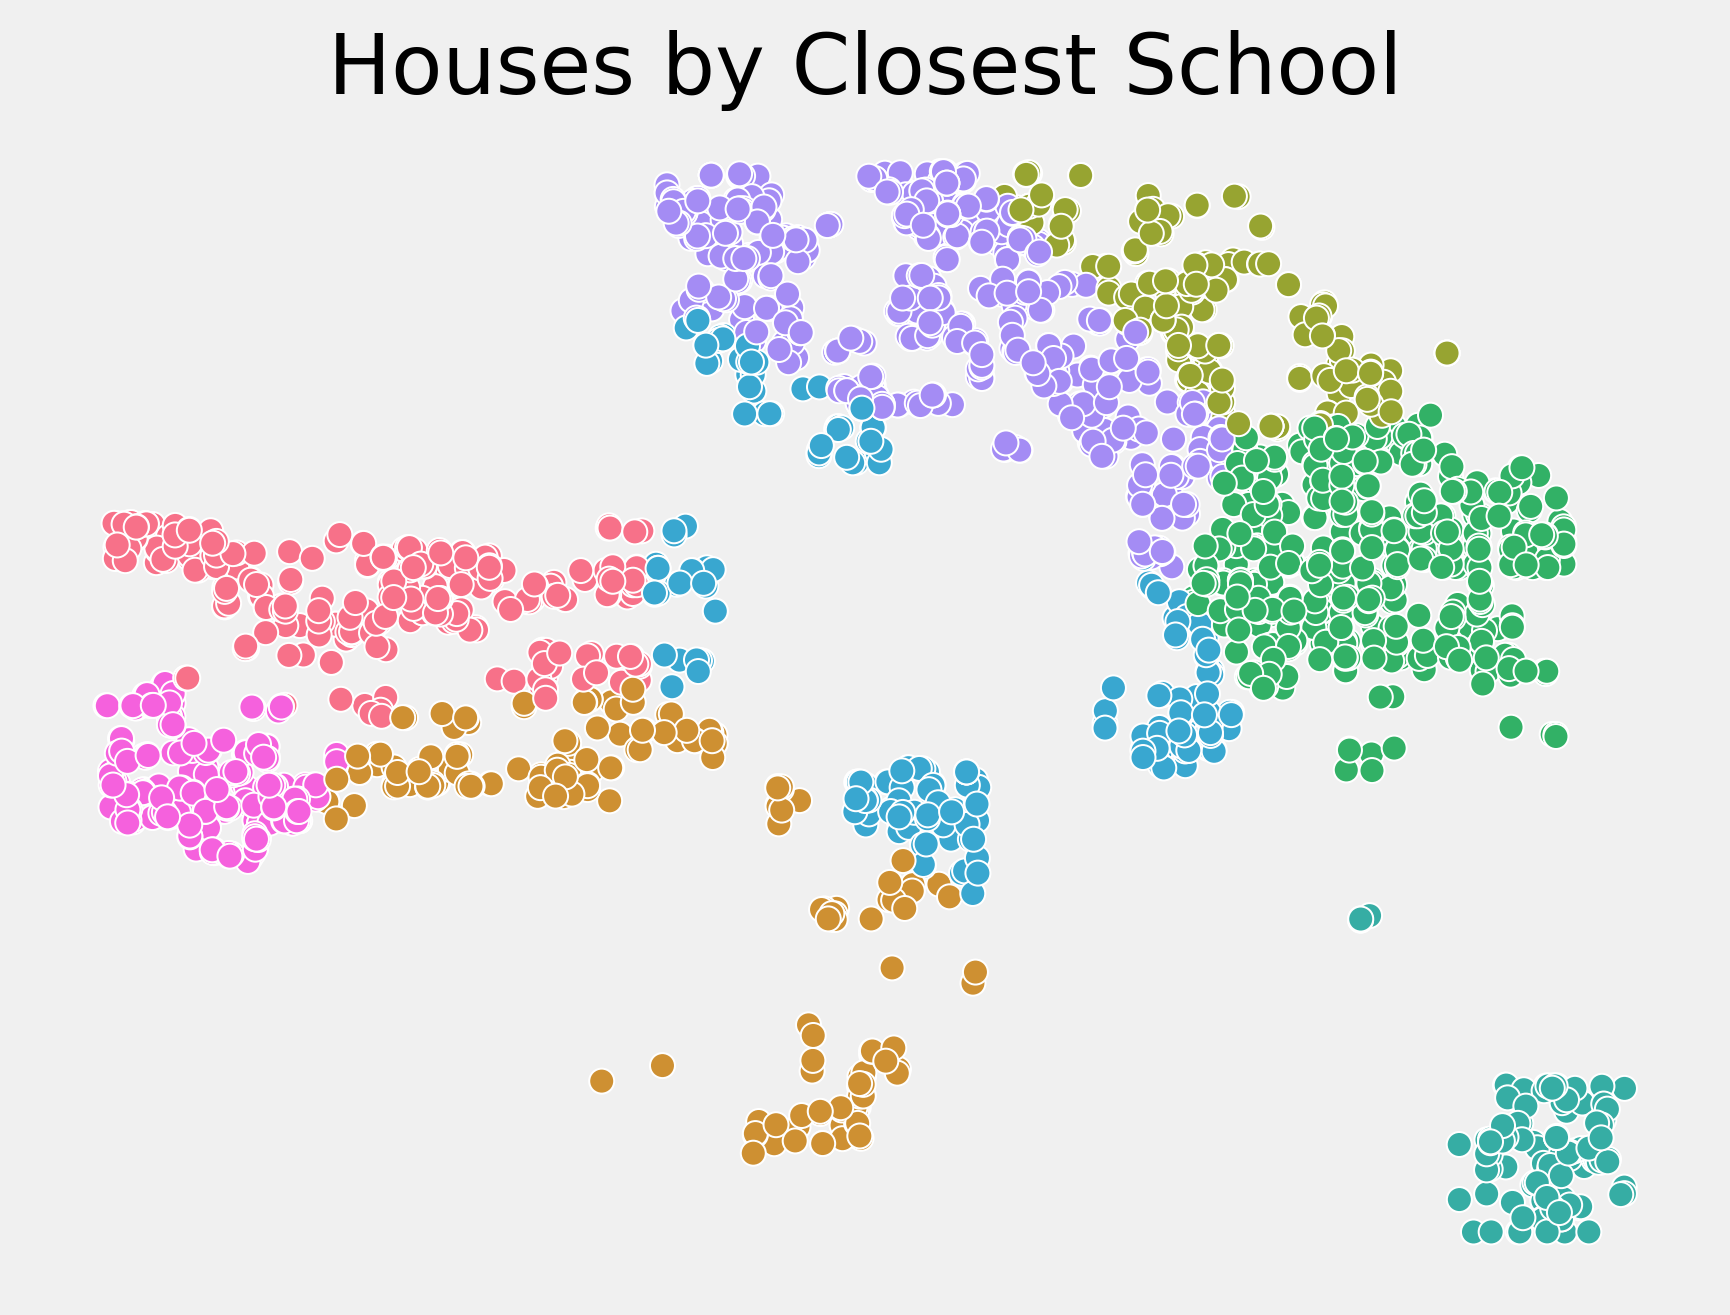

In [22]:
g = sns.scatterplot(data = housing, y = 'latitude',x = 'longitude',hue='closestSchool',
                   legend=False)
plt.tick_params(axis="x", bottom=False, top=False, labelbottom=False, labeltop=False,labelsize=16)
plt.tick_params(axis="y", left=False, right=False, labelleft=False, labelright=False,labelsize=16)
g.set(xlabel='', ylabel='',title='Houses by Closest School')
g.grid(False)

plt.show()

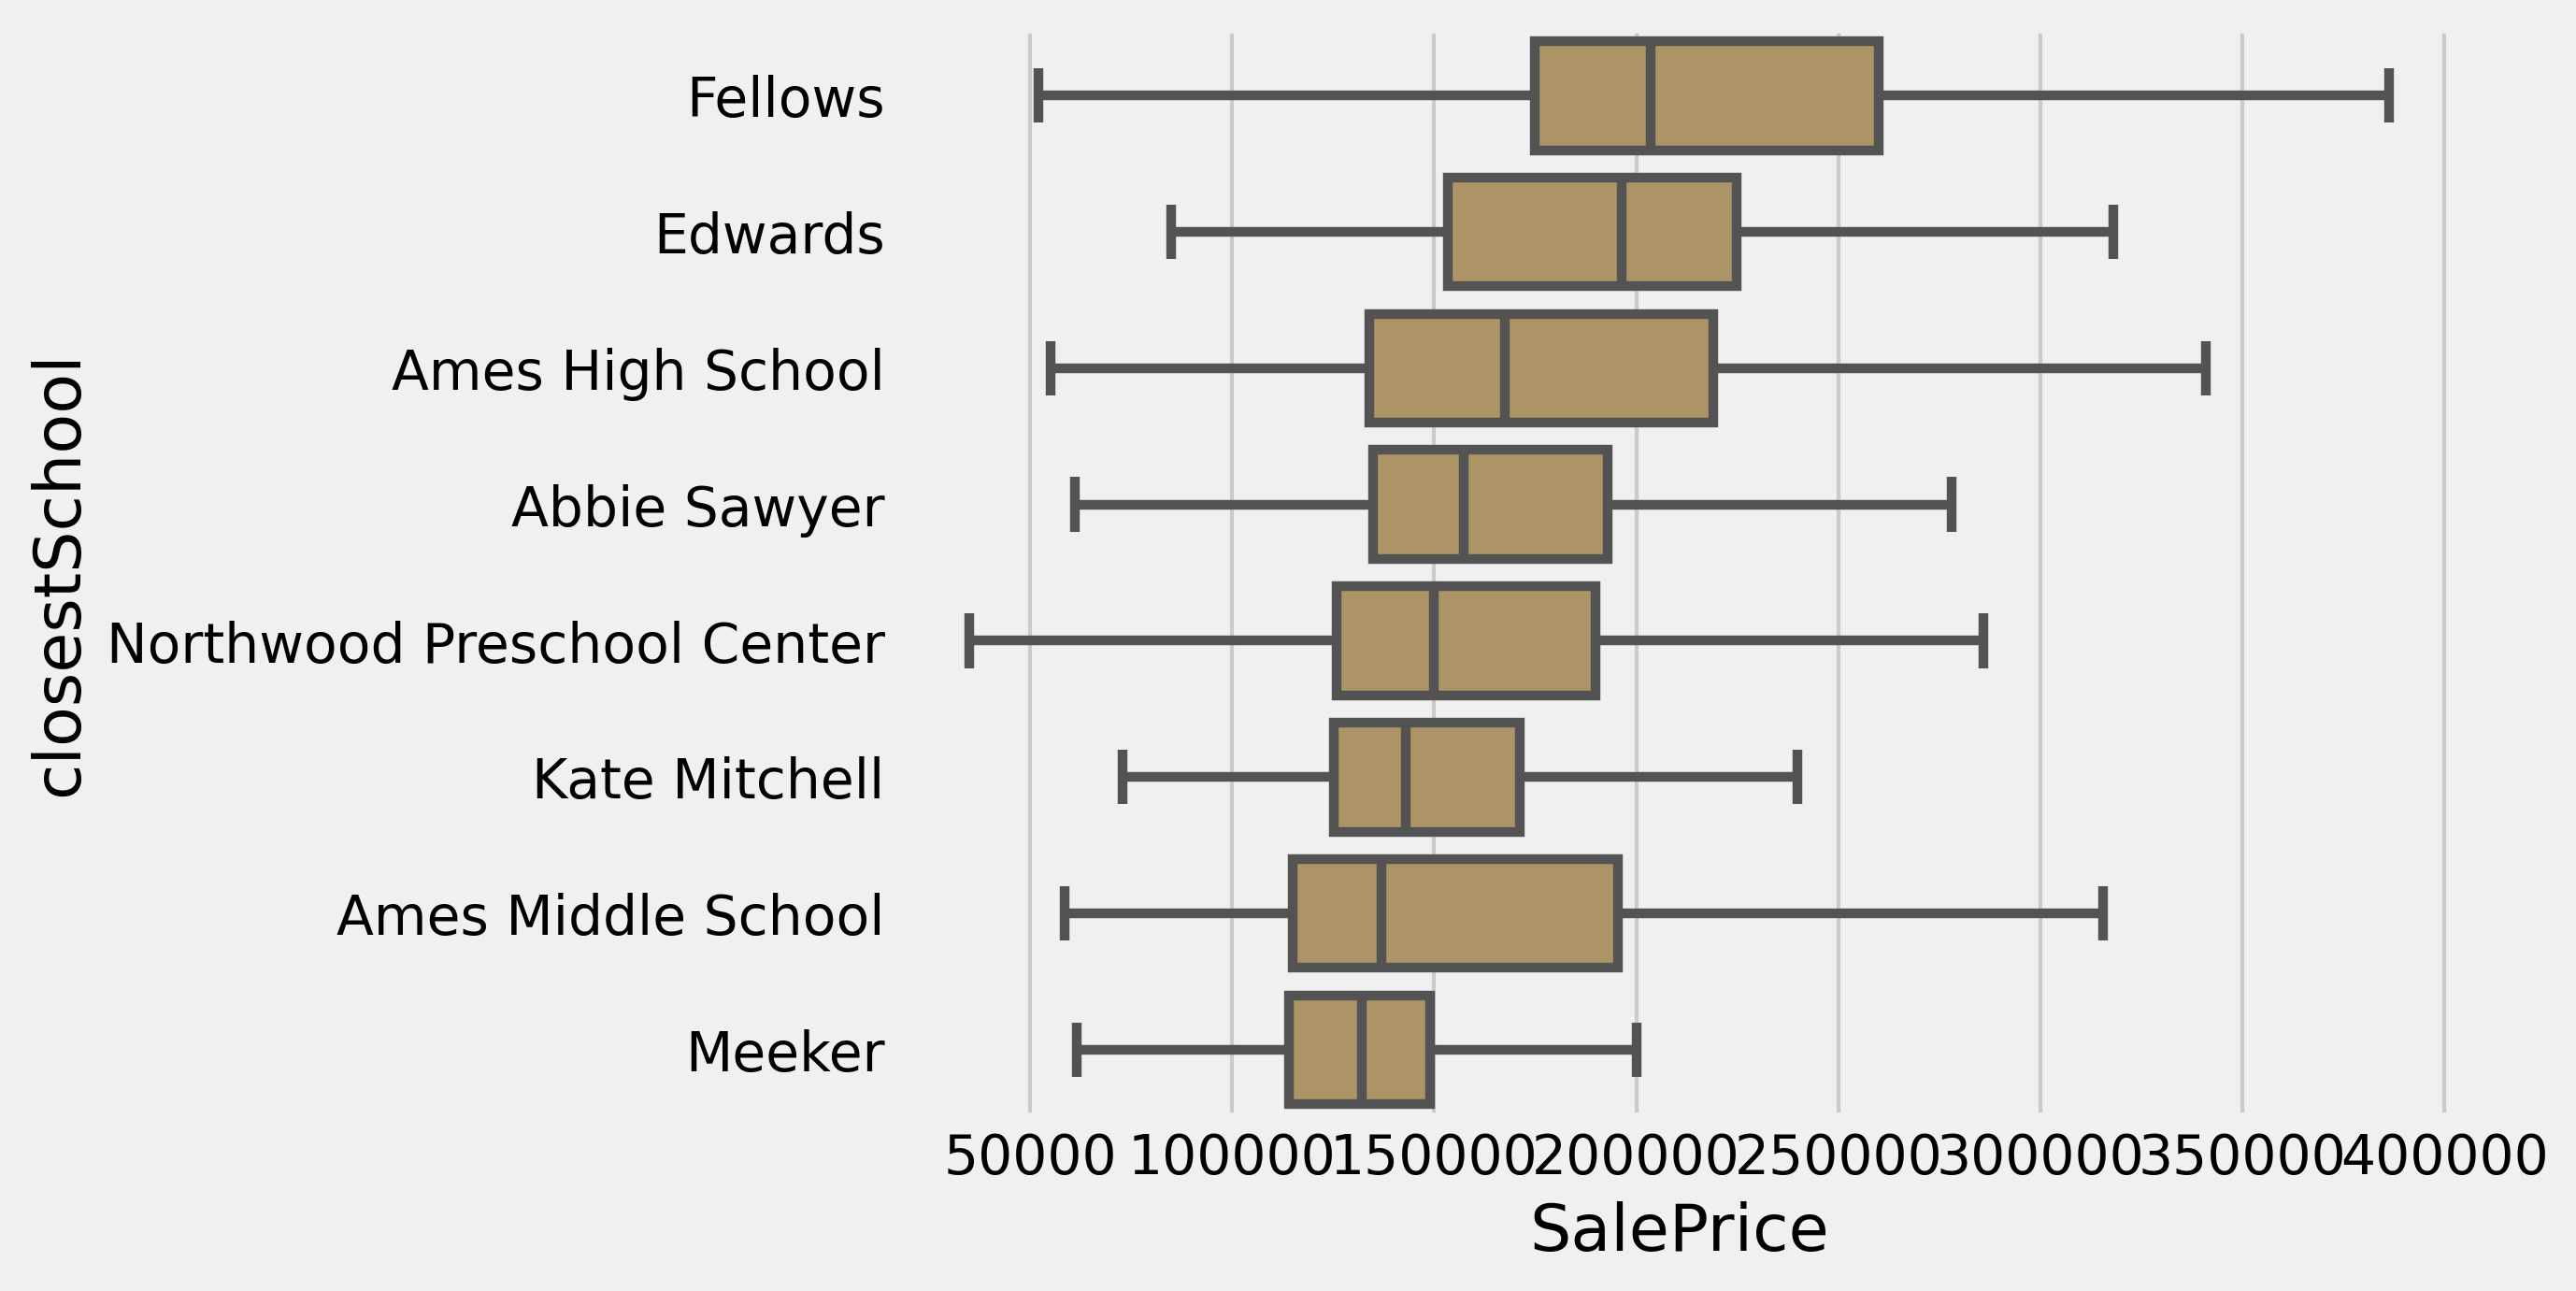

In [23]:
ordering = housing.groupby('closestSchool').agg({'SalePrice':'median'}).sort_values('SalePrice',ascending=False).index
g = sns.boxplot(data=housing,x='SalePrice',y='closestSchool',
                order = ordering,
#                 ax=ax,
                color = colors[2],
                linewidth=2.5,
                showfliers=False
               )
plt.show()